In [8]:
#!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install pandas_profiling --user

In [9]:
!pip uninstall pandas_profiling

Found existing installation: pandas-profiling 2.8.0
Uninstalling pandas-profiling-2.8.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-2.8.0


In [10]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 4.1 MB/s 
     |████████████████████████████████| 102 kB 9.8 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 596 kB 33.7 MB/s 
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: visions
    Found existing installation: visions 0.4.4
    Uninstalling visions-0.4.4:
      Successfully uninstalled visions-0.4.4
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does

* Em đang thực hiện explore data analysis để phân tích các features ảnh hưởng như thế nào đến giá bơ

* Công việc em đang thực hiện nằm ở bước Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import seaborn as sns

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Avocado/avocado.csv')
df = df.iloc[:, 1:]
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [ ]:
profile = ProfileReport(df, title = "Avocado Pandas Profill Report", html={'style':{'full_width': True} })

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nhận xét dựa trên các thông số và biểu đổ: 

    "Date" là cột "HIGH CARDINALITY" vì sẽ là cột dữ liệu cho dự đoán Time-Series

    "AveragePrice" sẽ là cột cần dự đoán và có chỉ correlation không cao với tất cả các cột còn lại

    "Total Volume" là cột có chỉ số cao về correlation với "4046", "4225", "4770", "Total Bags". Vì thông tin cho biết "Total Volume" bao gồm "4046", "4225", "4770" và 3 cột trên cũng có chỉ số high correlation nên có thể lựa cột "Total Volume" để train không cần sử dụng cột "4046", "4225", "4770" 

    "Total Bags" là cột có chỉ số cao về correlation với "Small Bags", "Large Bags", "XLarge Bags", "Total Volume". Vì thông tin cho biết "Total Bags" bao gồm "Small Bags", "Large Bags", "XLarge Bags" và 3 cột trên cũng có chỉ số high correlation nên có thể lựa cột "Total Volume" để train không cần sử dụng cột "Small Bags", "Large Bags", "XLarge Bags"

* Cardinality is the number of unique values in a column, not usually appear with number usually low or high

* High Cardinality mean it having a high level of number of unique values in a column it mean this column is not categorical variable



# Part II) Chect the correlation between 'Type', 'Region' with 'AveragePrice'

## 1)'Type' with 'AveragePrice' (density and probability)

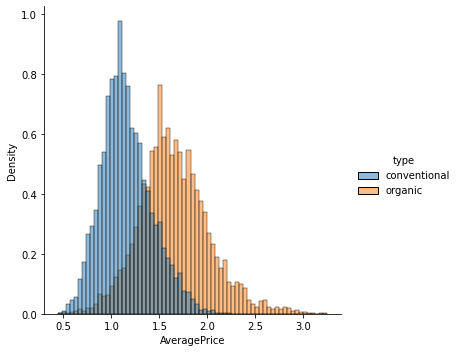

In [ ]:
sns.displot(df, x='AveragePrice', hue='type', stat = 'density')
plt.show()

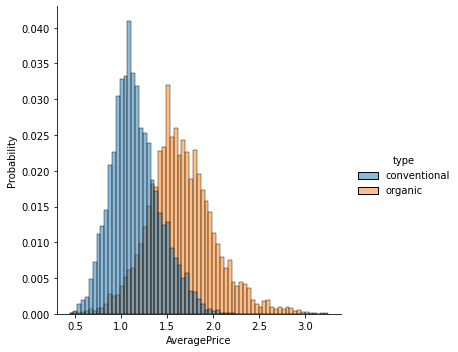

In [ ]:
sns.displot(df, x='AveragePrice', hue='type', stat = 'probability')
plt.show()

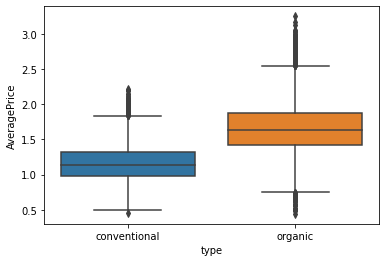

In [ ]:
sns.boxplot(data = df, x='type', y='AveragePrice')
plt.show()

## 2)'Region' with 'AveragePrice'

* On organic

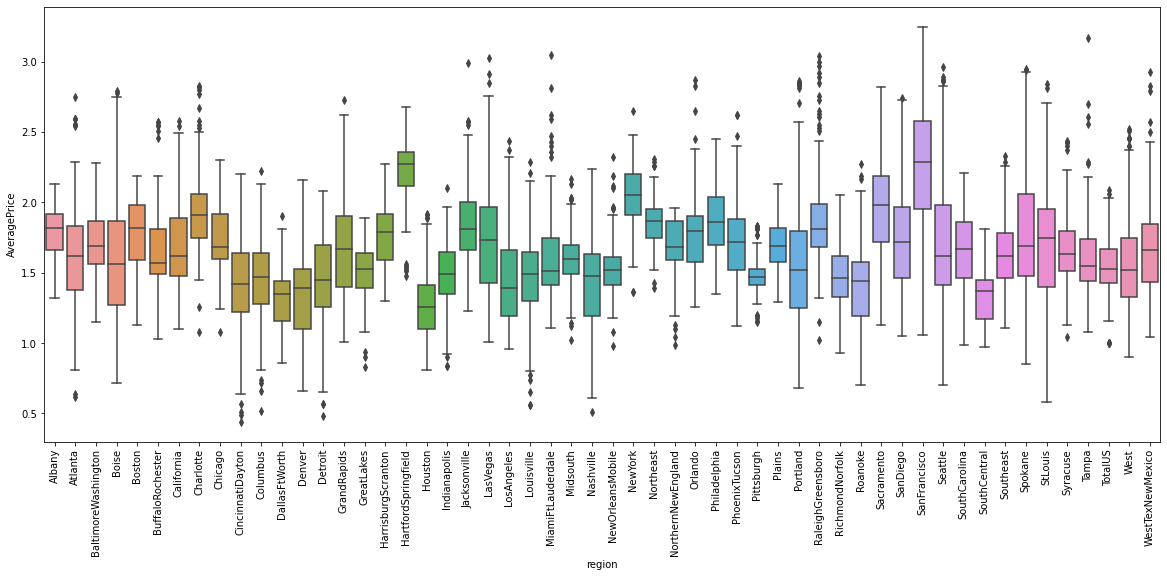

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

sns.boxplot(data=df.query('type == "organic"'),
          x='region',
          y='AveragePrice',
          ax = ax)

plt.xticks(rotation=90) # for X values rotation

plt.show()

* On conventional

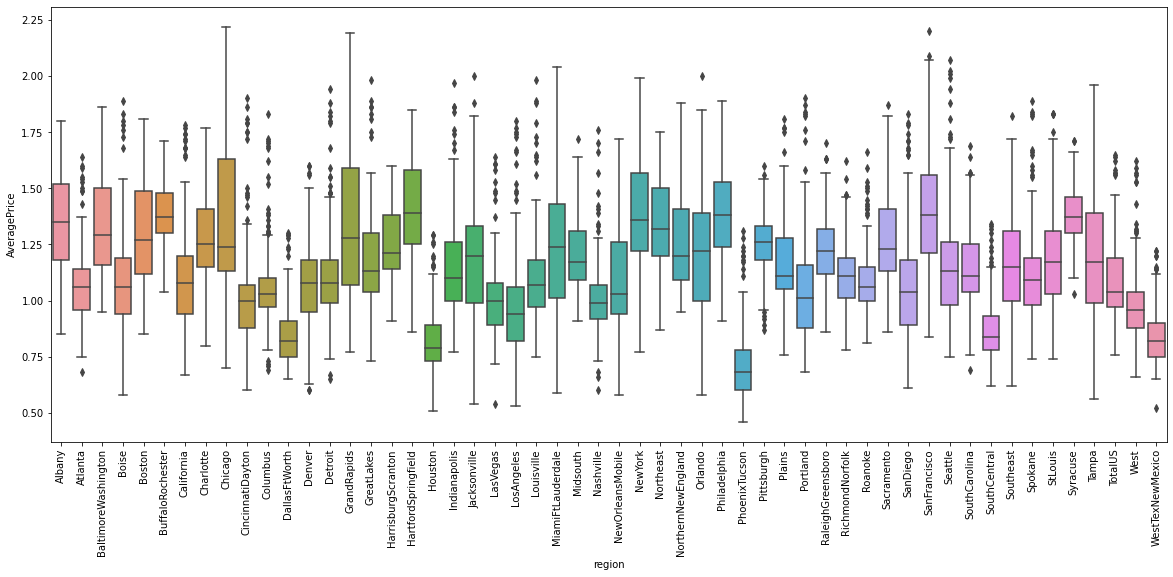

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

sns.boxplot(data = df.query('type == "conventional"'),
           x='region',
           y = 'AveragePrice',
           ax=ax)

plt.xticks(rotation=90)
plt.show()


Kết Luận về 'Region' with 'AveragePrice':

    Ở biểu đồ boxplot, em thấy có correlation giữa từng "region" với 'AveragePrice' và các "region" điều có "AveragePrice" khác nhau

## 3) Price analyze

* For Organic

In [ ]:
df_orga = df.query('type == "organic"')

In [ ]:
df_orga['AveragePrice'].describe()

count    9123.000000
mean        1.653999
std         0.363502
min         0.440000
25%         1.420000
50%         1.630000
75%         1.870000
max         3.250000
Name: AveragePrice, dtype: float64

In [ ]:
price_highest_or = df_orga.query('AveragePrice == 3.25')
price_highest_or

Date  AveragePrice  Total Volume     4046      4225  4770  \
14125  2016-10-30          3.25      16700.94  2325.93  11142.85   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
14125     3232.16     3232.16         0.0          0.0  organic  2016   

             region  
14125  SanFrancisco

In [ ]:
price_lowest_or = df_orga.query('AveragePrice == 0.44')
price_lowest_or

Date  AveragePrice  Total Volume    4046     4225  4770  \
15261  2017-03-05          0.44      64057.04  223.84  4748.88   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
15261    59084.32      638.68    58445.64          0.0  organic  2017   

                 region  
15261  CincinnatiDayton

* For conventional

In [ ]:
df_conv = df.query('type == "conventional"')

In [ ]:
df_conv['AveragePrice'].describe()

count    9126.000000
mean        1.158040
std         0.263041
min         0.460000
25%         0.980000
50%         1.130000
75%         1.320000
max         2.220000
Name: AveragePrice, dtype: float64

In [ ]:
price_highest_conv = df_conv.query('AveragePrice == 2.22')
price_highest_conv

Date  AveragePrice  Total Volume     4046       4225      4770  \
6052  2017-10-08          2.22     516320.59  62315.4  296817.34  87406.94   

      Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
6052    69780.91    66070.17     3699.01        11.73  conventional  2017   

       region  
6052  Chicago

In [ ]:
price_lowest_conv = df_conv.query('AveragePrice == 0.46')
price_lowest_conv

Date  AveragePrice  Total Volume        4046       4225      4770  \
7412  2017-02-05          0.46    2200550.27  1200632.86  531226.65  18324.93   

      Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
7412   450365.83   113752.17    330583.1      6030.56  conventional  2017   

             region  
7412  PhoenixTucson

## 4) Conclusion:

both 'Type', 'Region' effect 'AveragePrice'

# Part III) Continuous Features effect 'AveragePrice'

## 1) Correlation

In [ ]:
corr = df.corr()
corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

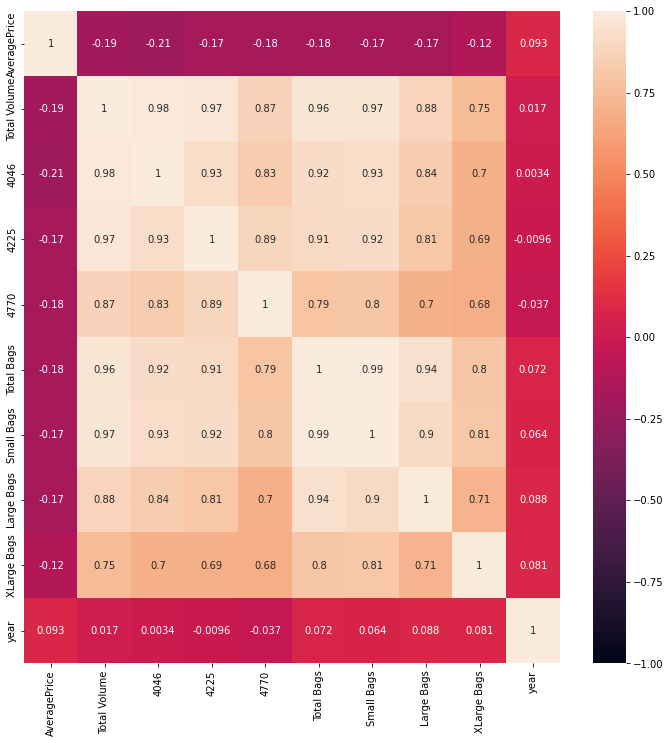

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

plt.show()

* Conclution in correlation:
    
    Every Independent Features don't have high correlation with Dependent Feature 
    
    The "Total Volume" Feature have high correlation with "4046", "4225", "4770" Features
    
    The "Total Bags" Feature have high correlation with "Small Bag", "Large Bags", "XLarge Bags" Features
    
    
 * There will be low Accuracy for linearity model, best use decision tree base model
 
 
 * We can use both "Total Volume", "Total Bags" features for model training without the sub-features like: "Small Bag", "Large Bags", "XLarge Bags"

# Part IV ) Check data values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [ ]:
df.duplicated().any()

False

In [ ]:
df.shape

(18249, 13)

In [ ]:
np.corrcoef(df['AveragePrice'], df.iloc[:, 2 ])

array([[ 1.        , -0.19275239],
       [-0.19275239,  1.        ]])

In [ ]:
np.corrcoef(df['AveragePrice'], df.iloc[:, 6])

array([[ 1.        , -0.17708793],
       [-0.17708793,  1.        ]])

# Part V) Chect the correlation between time base features with 'AveragePrice'

In [ ]:
def convert_month(month):
    if month == 3 or month == 4 or month == 5:
        return 0
    elif month == 6 or month == 7 or month == 8:
        return 1
    elif month == 9 or month == 10 or month == 11:
        return 2
    elif month == 12 or month == 1 or month == 2:
        return 3

In [ ]:
df1 = df.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [ ]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month  Season  
0                Albany     12       3  
1                Albany     12       3  
2                Albany     12       3  
3                Albany     12       3  
4                Albany     11       2  
...                 ...    ...     ...  
18244  WestTexNewMexico      2       3  
18245  WestTexNewMexico      1       3  
18246  WestTexNewMexico      1       3  
18247  WestTexNewMexico      1       3  
18248  WestTexNewMexico      1       3  

[18249 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

* For organic

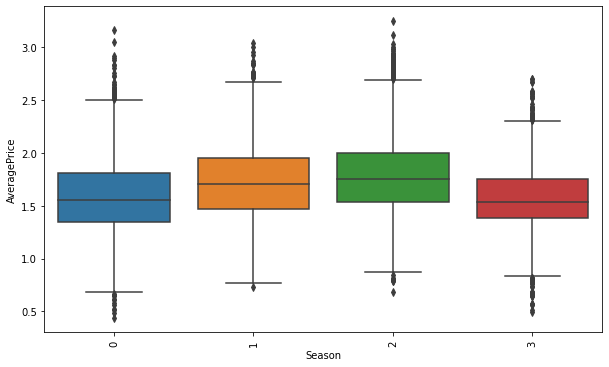

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data = df.query('type == "organic"'),
             x = 'Season',             
             y = 'AveragePrice',
             ax = ax)

plt.xticks(rotation=90)

plt.show()

* For conventional

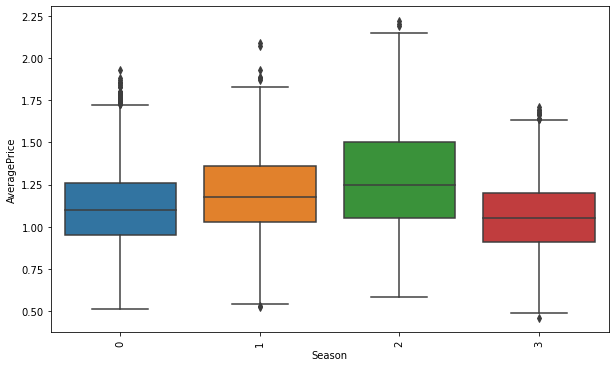

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data = df.query('type == "conventional"'),
             x = 'Season',             
             y = 'AveragePrice',
             ax = ax)

plt.xticks(rotation=90)

plt.show()

Kết luận về "Season":Kết luận về "Season":

    Mỗi "Season" của mỗi "type" đều có sự ảnh hưởng riêng và khác nhau với giá tiền nên sẽ cần thiết cho Regression Predict


## Part VI) Show Average Price of each Avocado in each city of each year 

In [ ]:
df_con = df.query('type == "conventional"')
df_con

Date  AveragePrice  Total Volume       4046       4225      4770  \
0    2015-12-27          1.33      64236.62    1036.74   54454.85     48.16   
1    2015-12-20          1.35      54876.98     674.28   44638.81     58.33   
2    2015-12-13          0.93     118220.22     794.70  109149.67    130.50   
3    2015-12-06          1.08      78992.15    1132.00   71976.41     72.58   
4    2015-11-29          1.28      51039.60     941.48   43838.39     75.78   
...         ...           ...           ...        ...        ...       ...   
9121 2018-02-04          0.76    1272039.80  531469.08  368948.26  13078.20   
9122 2018-01-28          0.85     957086.16  479147.93  179489.19   7314.98   
9123 2018-01-21          0.84    1020913.20  505263.29  177911.40   9468.95   
9124 2018-01-14          0.90     950954.60  463945.73  188126.02  11227.47   
9125 2018-01-07          0.88     880266.52  436282.38  178669.53   9467.11   

      Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0        8696.87     8603.62       93.25         0.00  conventional  2015   
1        9505.56     9408.07       97.49         0.00  conventional  2015   
2        8145.35     8042.21      103.14         0.00  conventional  2015   
3        5811.16     5677.40      133.76         0.00  conventional  2015   
4        6183.95     5986.26      197.69         0.00  conventional  2015   
...          ...         ...         ...          ...           ...   ...   
9121   358544.26   127833.03   229786.03       925.20  conventional  2018   
9122   291134.06   143430.96   147376.43       326.67  conventional  2018   
9123   328269.56   118978.50   209131.06       160.00  conventional  2018   
9124   287655.38   125408.69   162040.02       206.67  conventional  2018   
9125   255847.50    99686.92   155870.58       290.00  conventional  2018   

                region  Month  Season  
0               Albany     12       3  
1               Albany     12       3  
2               Albany     12       3  
3               Albany     12       3  
4               Albany     11       2  
...                ...    ...     ...  
9121  WestTexNewMexico      2       3  
9122  WestTexNewMexico      1       3  
9123  WestTexNewMexico      1       3  
9124  WestTexNewMexico      1       3  
9125  WestTexNewMexico      1       3  

[9126 rows x 15 columns]

In [ ]:
for i in df_con.region.unique():
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    sns.lineplot(data=df_con.loc[df_con['region'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'region' , 
                     legend='full')

    # add title
    plt.title('Average Price of Conventional Avocado ' + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_ogr = df.query('type == "organic"')
df_ogr

Date  AveragePrice  Total Volume     4046     4225    4770  \
9126  2015-12-27          1.83        989.55     8.16    88.59    0.00   
9127  2015-12-20          1.89       1163.03    30.24   172.14    0.00   
9128  2015-12-13          1.85        995.96    10.44   178.70    0.00   
9129  2015-12-06          1.84       1158.42    90.29   104.18    0.00   
9130  2015-11-29          1.94        831.69     0.00    94.73    0.00   
...          ...           ...           ...      ...      ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
9126       892.80      892.80        0.00          0.0  organic  2015   
9127       960.65      960.65        0.00          0.0  organic  2015   
9128       806.82      806.82        0.00          0.0  organic  2015   
9129       963.95      948.52       15.43          0.0  organic  2015   
9130       736.96      736.96        0.00          0.0  organic  2015   
...           ...         ...         ...          ...      ...   ...   
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  Month  Season  
9126             Albany     12       3  
9127             Albany     12       3  
9128             Albany     12       3  
9129             Albany     12       3  
9130             Albany     11       2  
...                 ...    ...     ...  
18244  WestTexNewMexico      2       3  
18245  WestTexNewMexico      1       3  
18246  WestTexNewMexico      1       3  
18247  WestTexNewMexico      1       3  
18248  WestTexNewMexico      1       3  

[9123 rows x 15 columns]

In [ ]:
for i in df_ogr.region.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    sns.lineplot(data=df_ogr.loc[df_ogr['region'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'region' , 
                     legend='full')

    # add title
    plt.title('Average Price of Organic Avocado ' + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
max_price = df_ogr.query('Date == "2018-03-25"')
max_price.describe()

AveragePrice  Total Volume           4046           4225         4770  \
count     54.000000  5.400000e+01      54.000000      54.000000    54.000000   
mean       1.546481  7.751080e+04    5972.836111   17316.183333    54.835370   
std        0.203592  2.182426e+05   17489.024740   48806.920082   171.718881   
min        1.030000  2.321820e+03       8.000000      10.910000     0.000000   
25%        1.420000  1.020149e+04     149.187500    1016.802500     0.000000   
50%        1.550000  1.890201e+04     708.180000    2947.295000     0.000000   
75%        1.660000  3.838192e+04    3459.492500   10897.092500     9.757500   
max        2.090000  1.559967e+06  121007.940000  342853.100000  1070.240000   

         Total Bags    Small Bags     Large Bags  XLarge Bags    year  Month  \
count  5.400000e+01      54.00000      54.000000    54.000000    54.0   54.0   
mean   5.411829e+04   44747.90463    9362.270556     8.116667  2018.0    3.0   
std    1.534427e+05  127168.69530   28504.311888    31.353200     0.0    0.0   
min    2.006460e+03     618.64000       0.000000     0.000000  2018.0    3.0   
25%    7.297725e+03    7166.15250      47.070000     0.000000  2018.0    3.0   
50%    1.364537e+04    9836.07000     937.930000     0.000000  2018.0    3.0   
75%    3.724833e+04   28501.72500    4274.707500     0.000000  2018.0    3.0   
max    1.093861e+06  902774.79000  190941.840000   144.460000  2018.0    3.0   

       Season  
count    54.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

In [ ]:
max_price.query('AveragePrice == 2.09')

Date  AveragePrice  Total Volume   4046      4225  4770  \
17805 2018-03-25          2.09      20242.65  144.4  10949.63   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
17805     9148.62     9137.73       10.89          0.0  organic  2018   

                    region  Month  Season  
17805  HartfordSpringfield      3       0

# Potential candidate:

## Albany

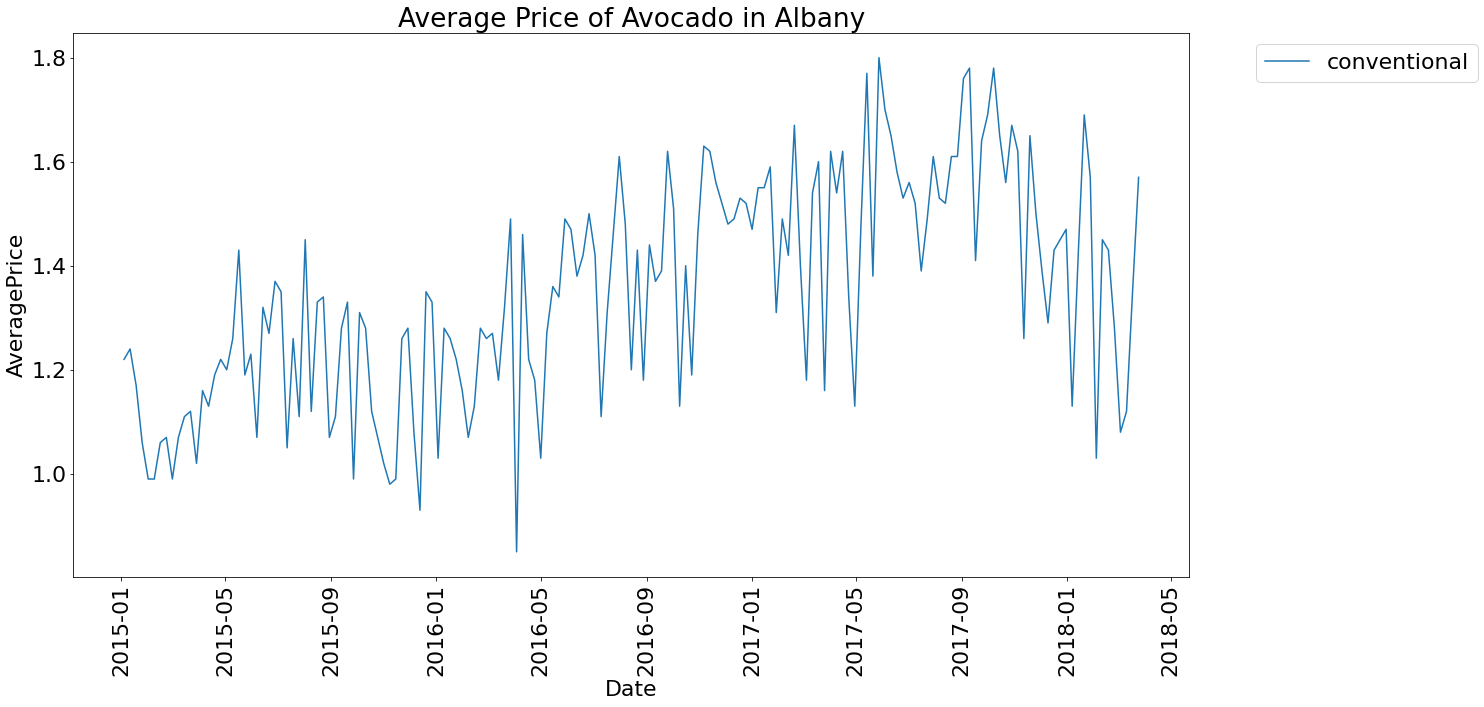

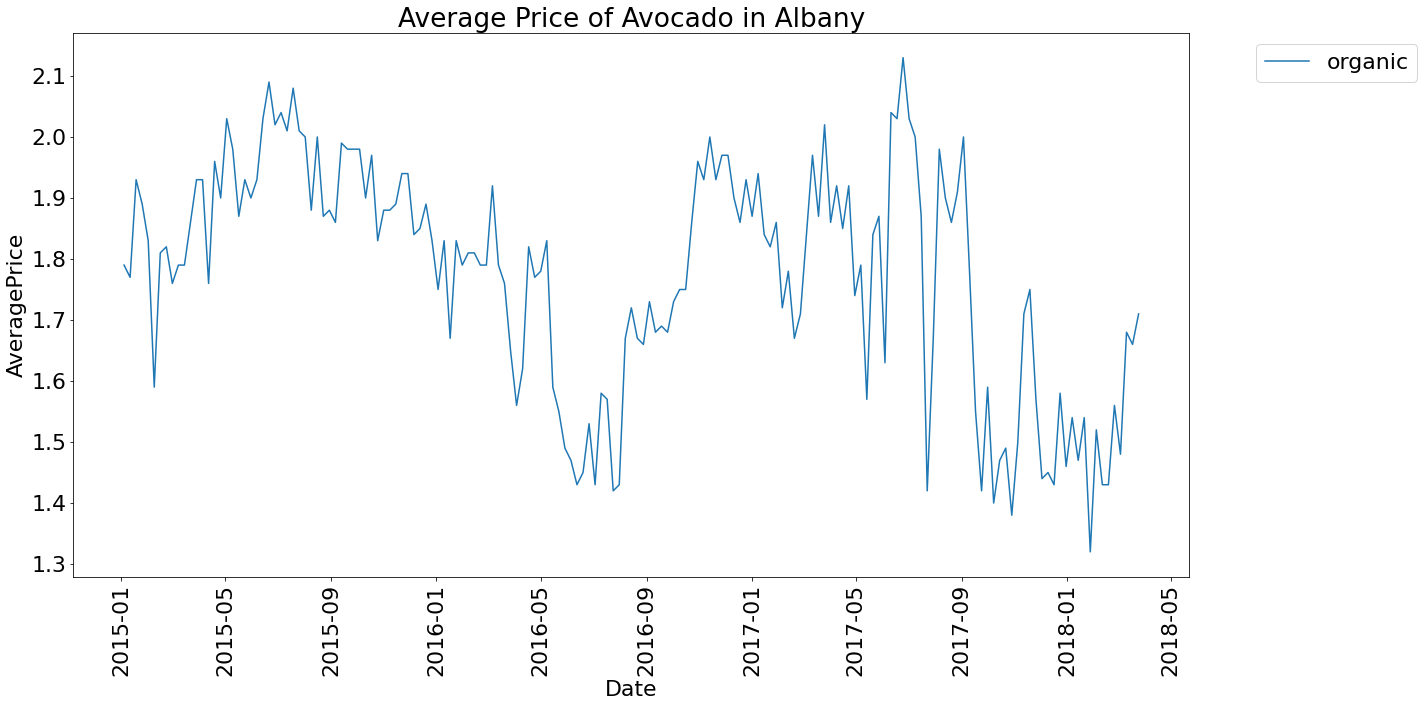

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_albany = df.query('region == "Albany"')
    sns.lineplot(data=df_albany.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in Albany")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


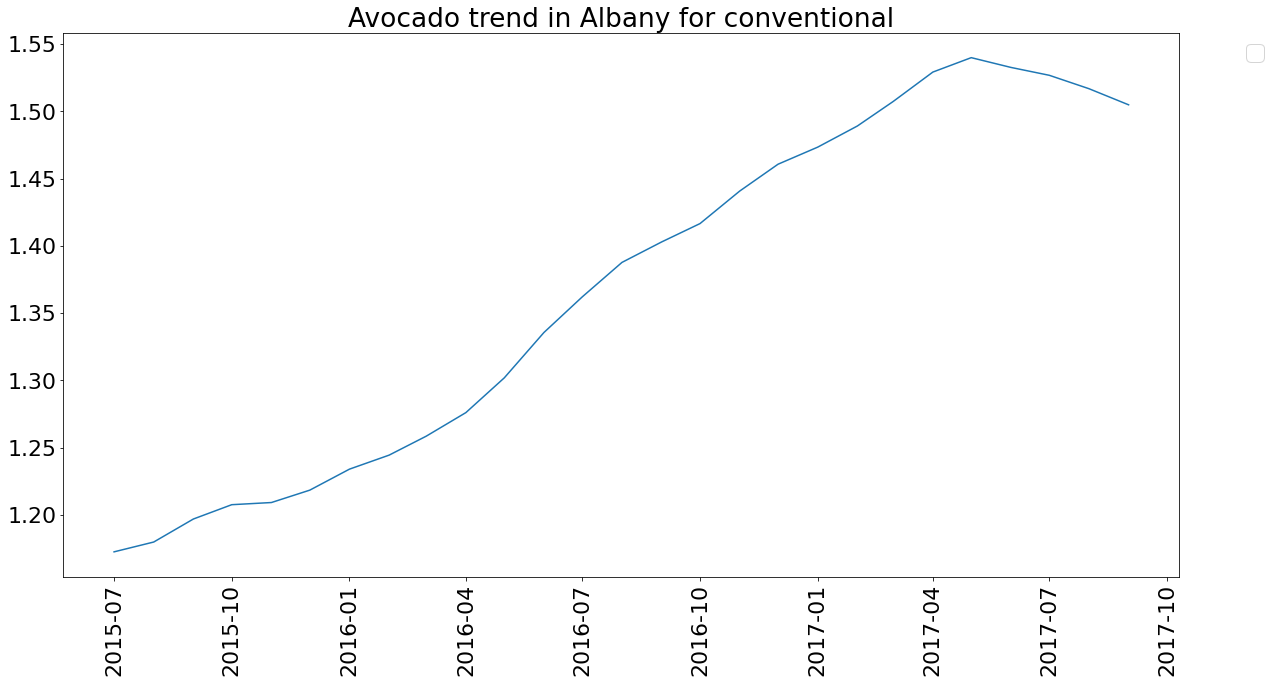

No handles with labels found to put in legend.


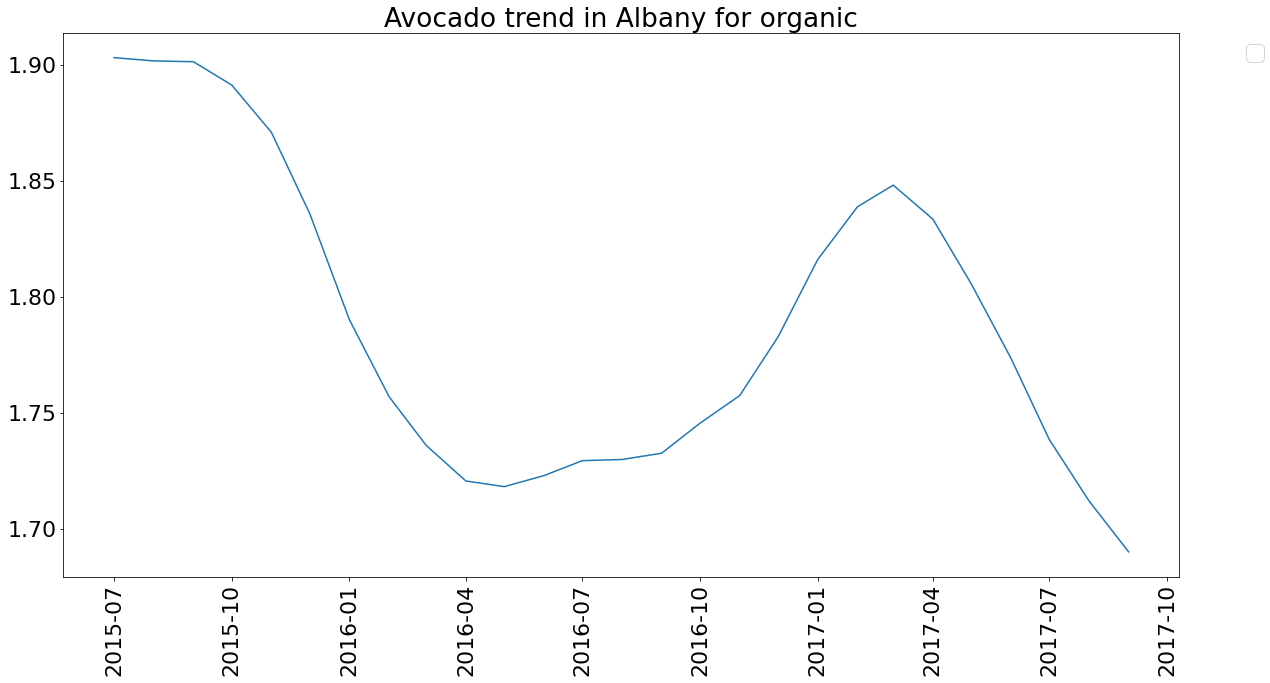

In [ ]:


for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_albany = df.query('region == "Albany"')
    df_albany['Date'] = df_albany['Date'].astype("string")
    df_albany['Date'] = df_albany['Date'].str[:-3]
    df_albany = df_albany.loc[df['type'] == i]
    df_albany_price = df_albany.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_albany_price = df_albany_price.groupby(df_albany_price['Date']).aggregate(agg).reset_index()
    df_albany_price['Date'] = pd.to_datetime(df_albany_price['Date'])

    decompose_con = df_albany_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in Albany for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

## HartfordSpringfield

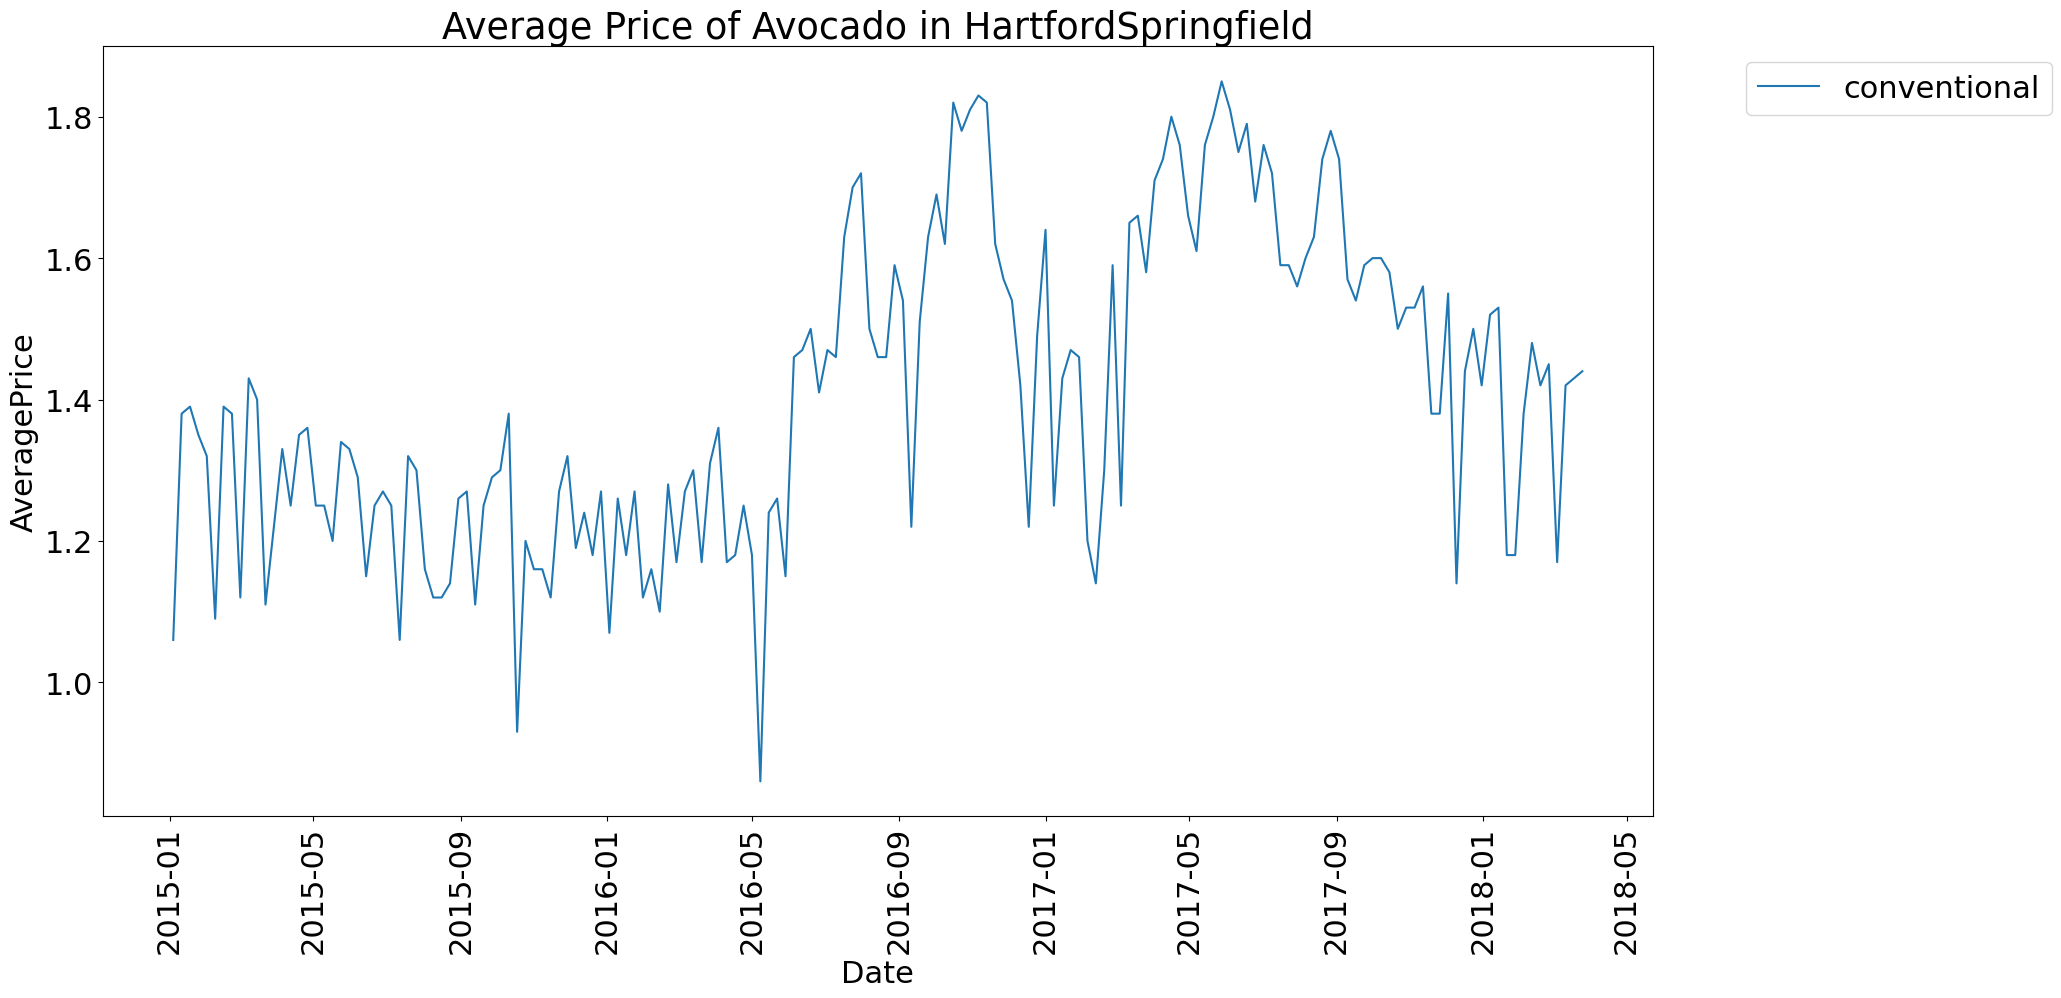

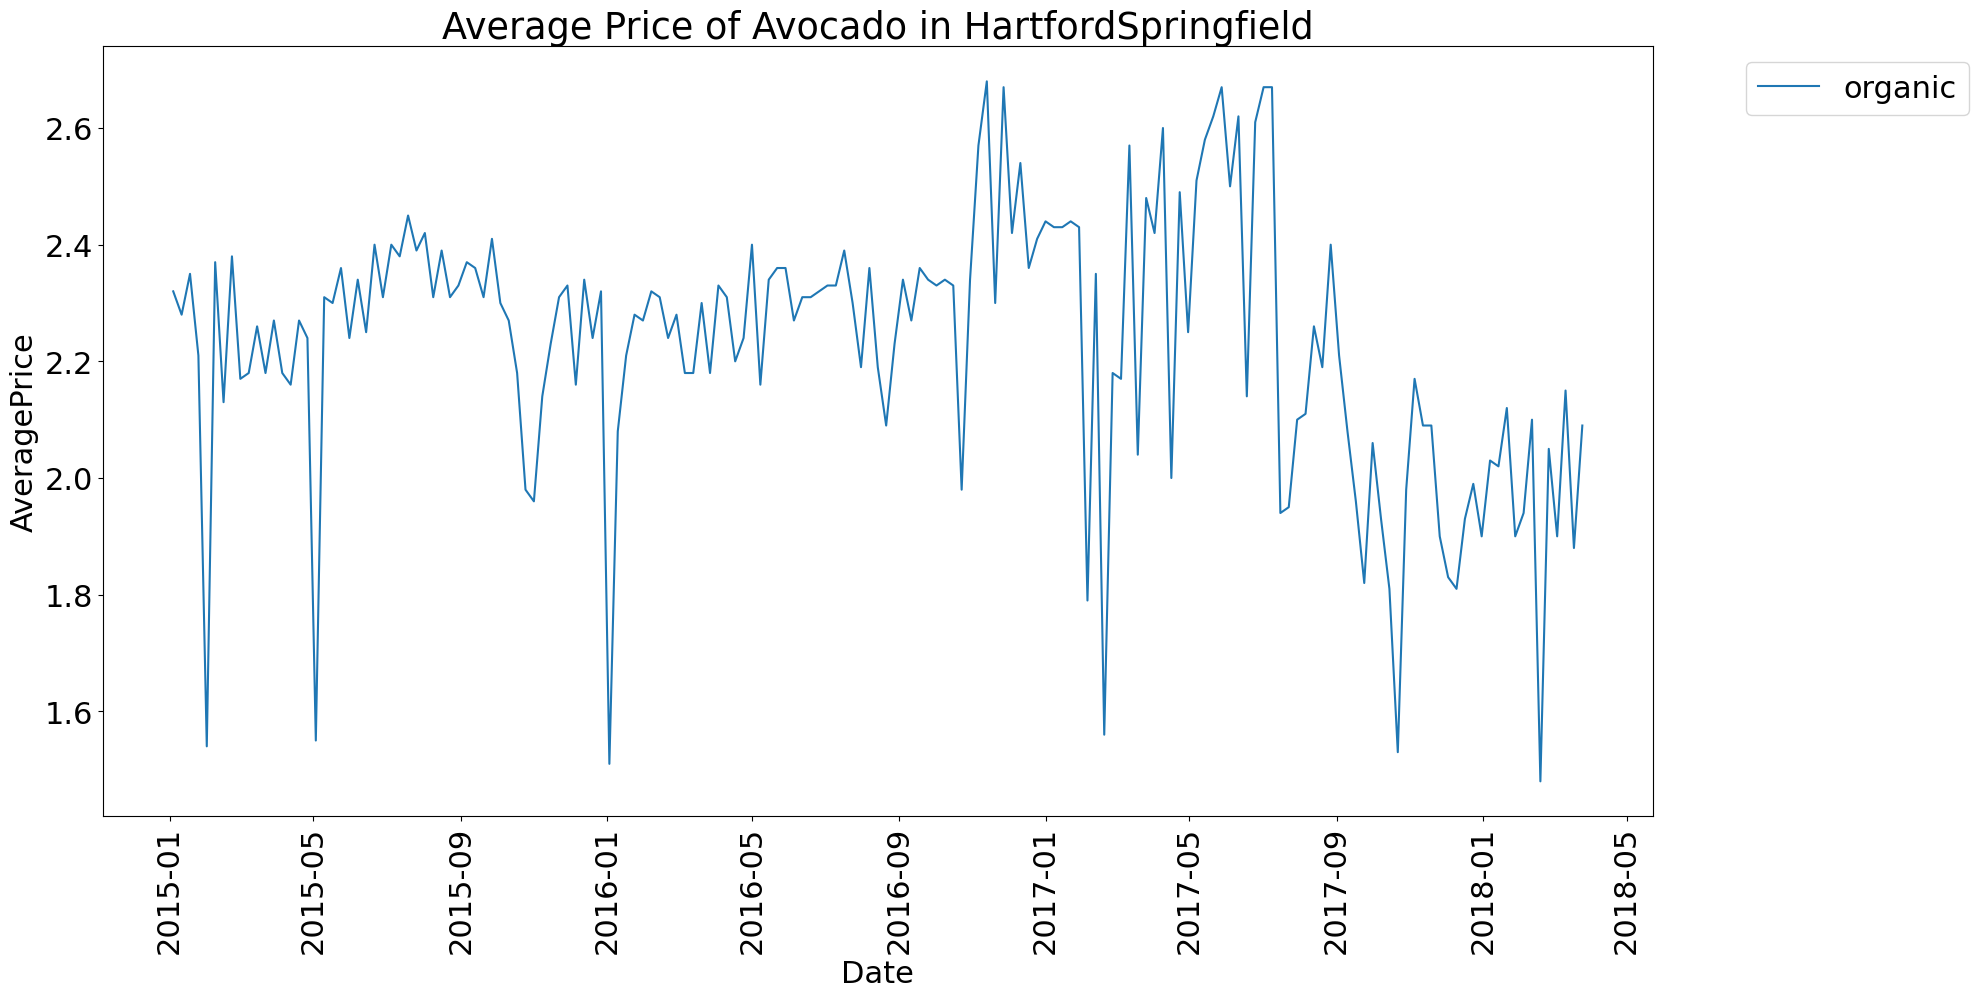

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_HartfordSpringfield = df.query('region == "HartfordSpringfield"')
    sns.lineplot(data=df_HartfordSpringfield.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in HartfordSpringfield")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


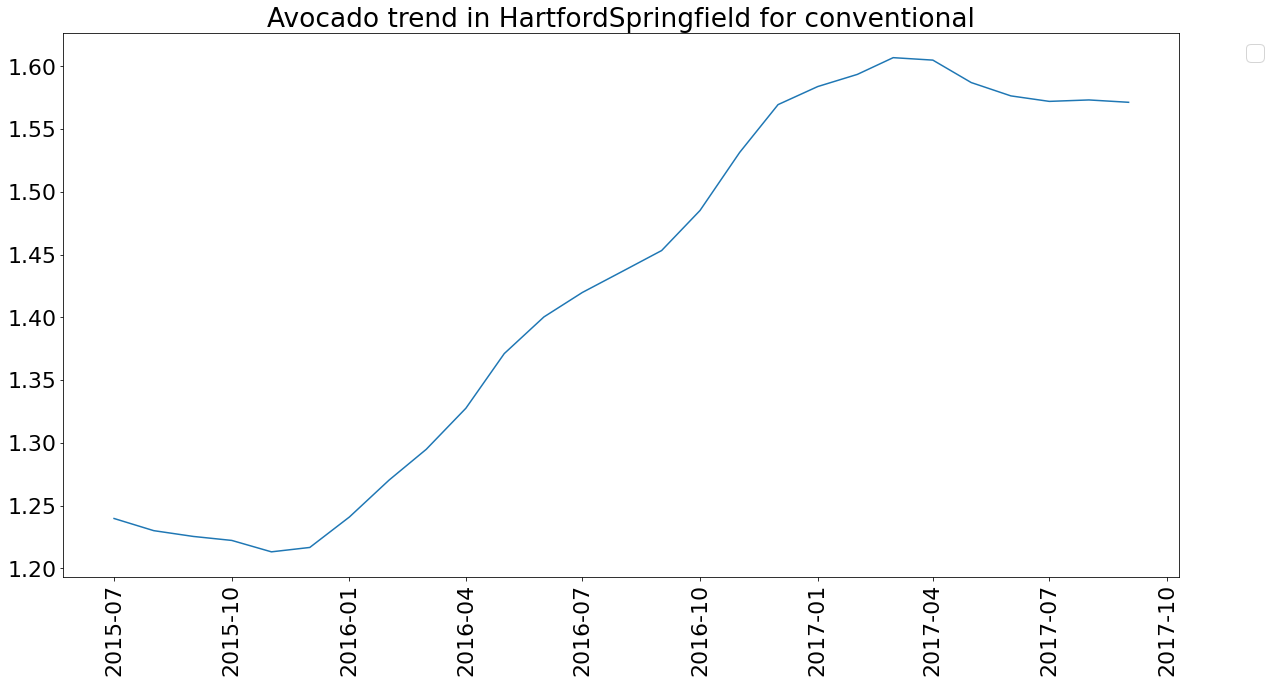

No handles with labels found to put in legend.


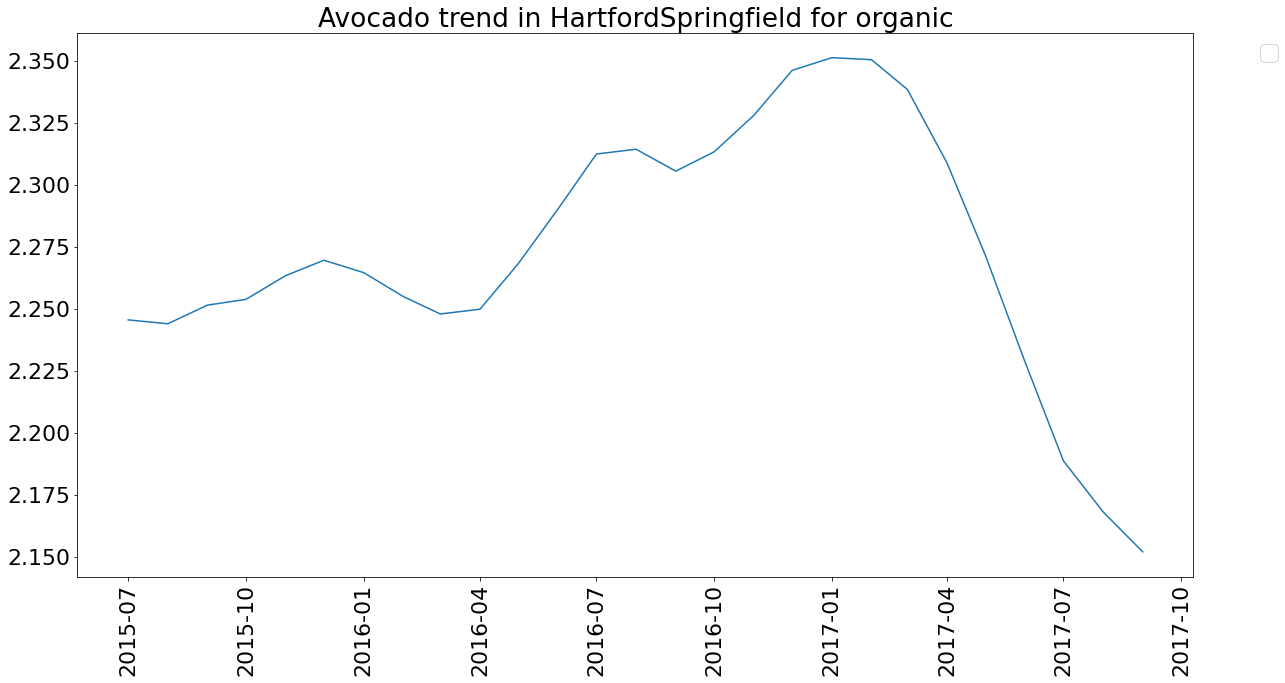

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_hs = df.query('region == "HartfordSpringfield"')
    df_hs['Date'] = df_hs['Date'].astype("string")
    df_hs['Date'] = df_hs['Date'].str[:-3]
    df_hs = df_hs.loc[df['type'] == i]
    df_hs_price = df_hs.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_hs_price = df_hs_price.groupby(df_hs_price['Date']).aggregate(agg).reset_index()
    df_hs_price['Date'] = pd.to_datetime(df_hs_price['Date'])

    decompose_con = df_hs_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in HartfordSpringfield for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

## NewYork

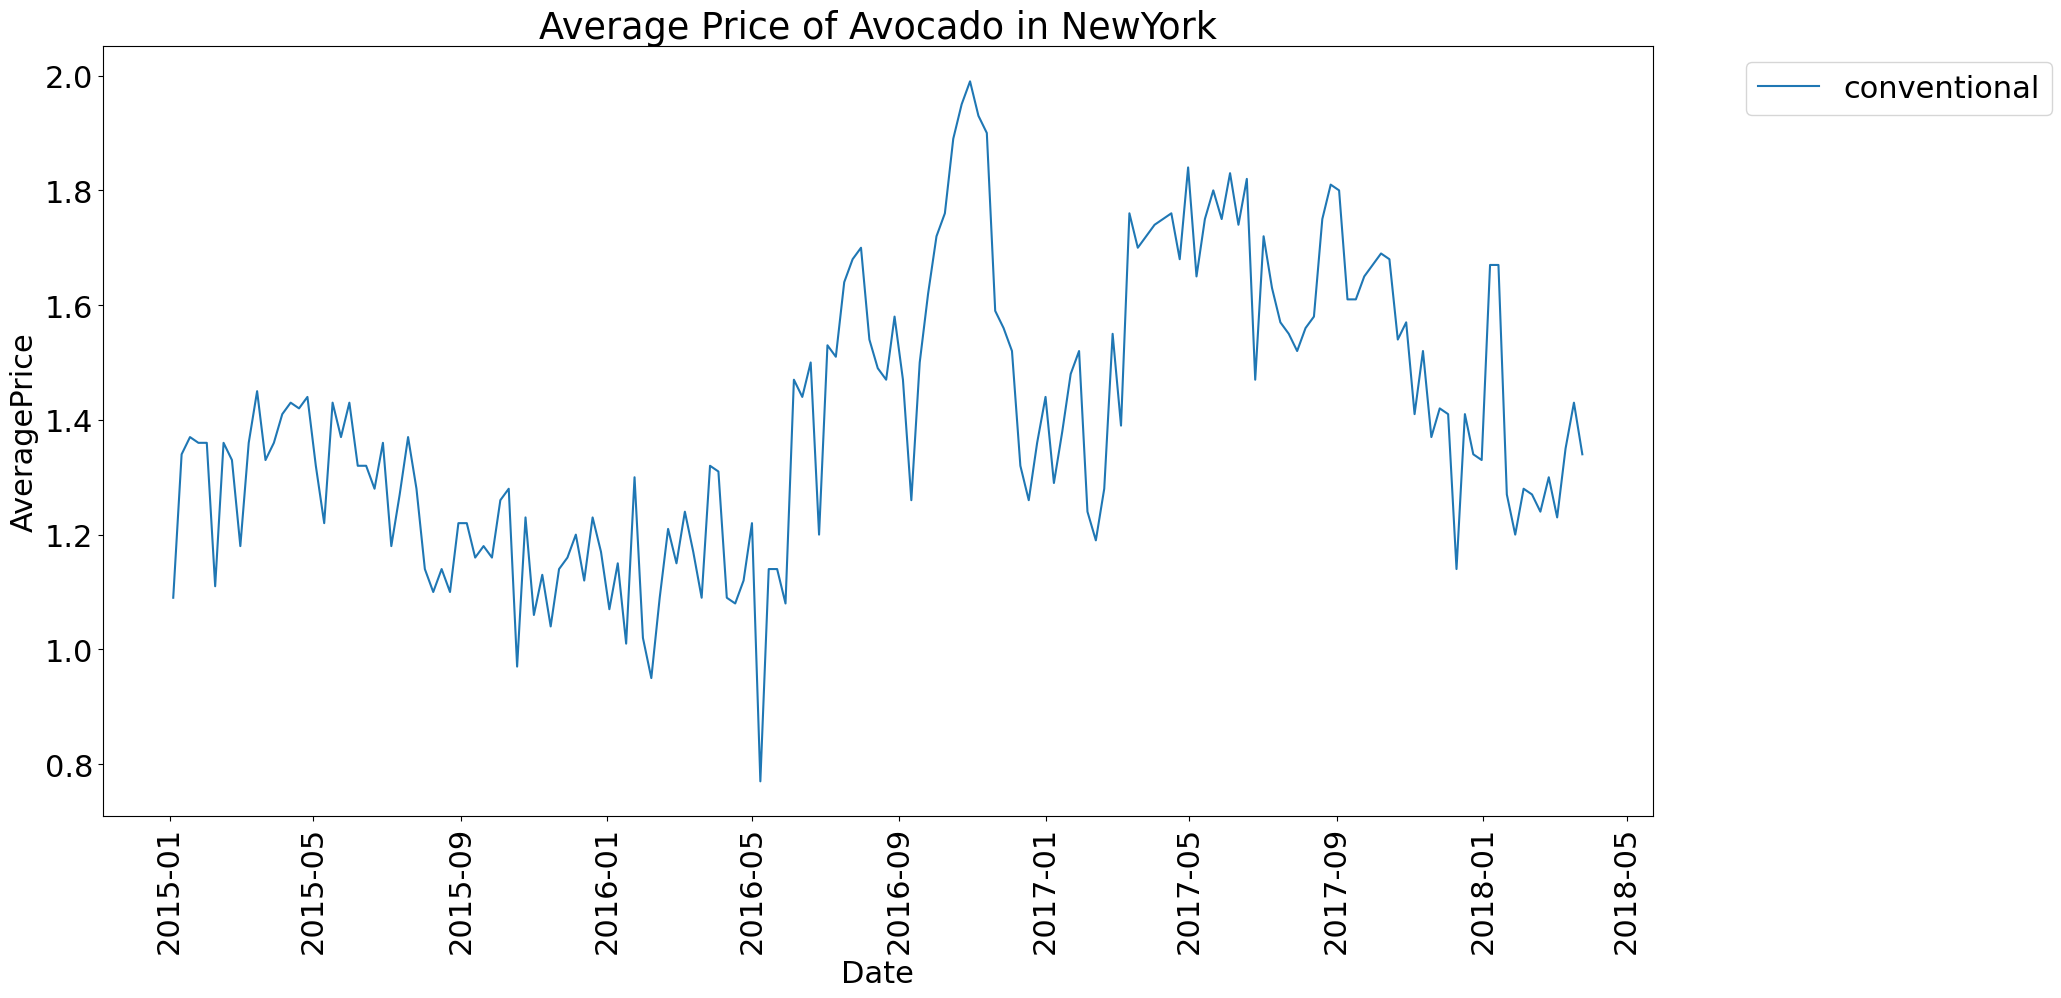

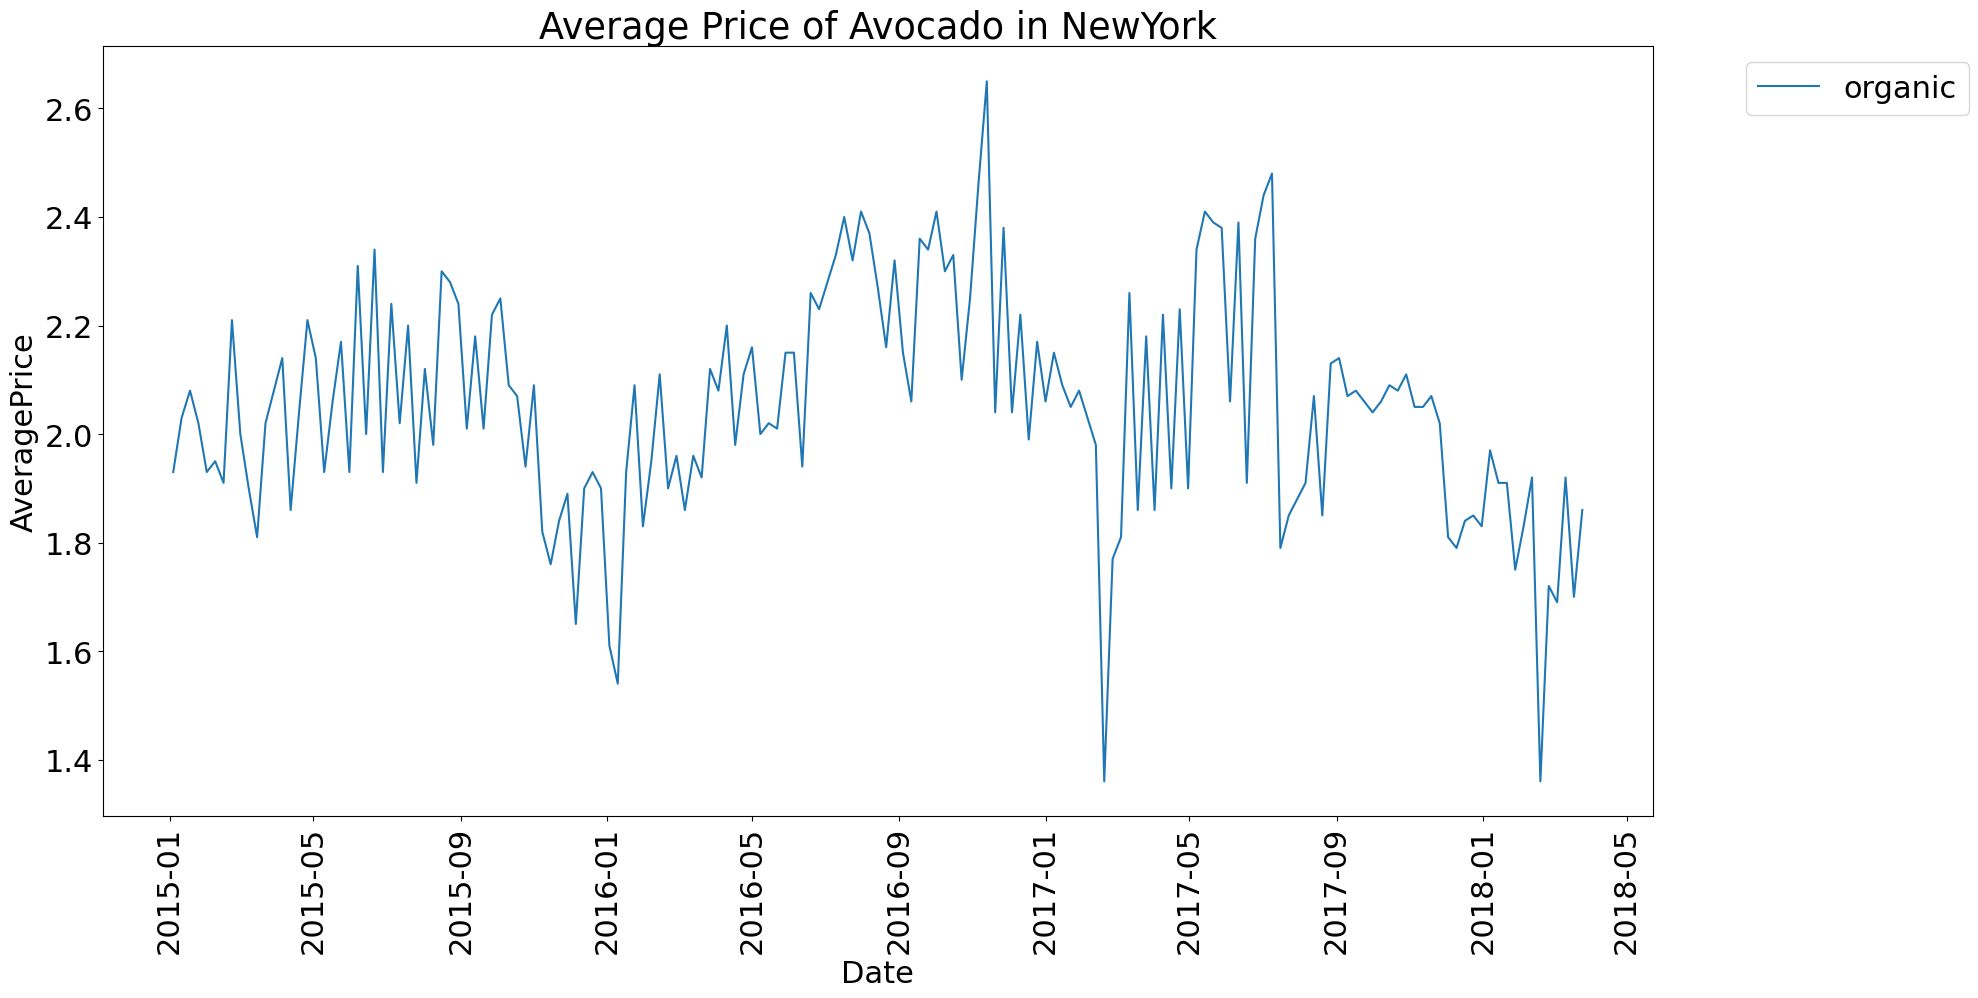

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_NewYork = df.query('region == "NewYork"')
    sns.lineplot(data=df_NewYork.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in NewYork")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


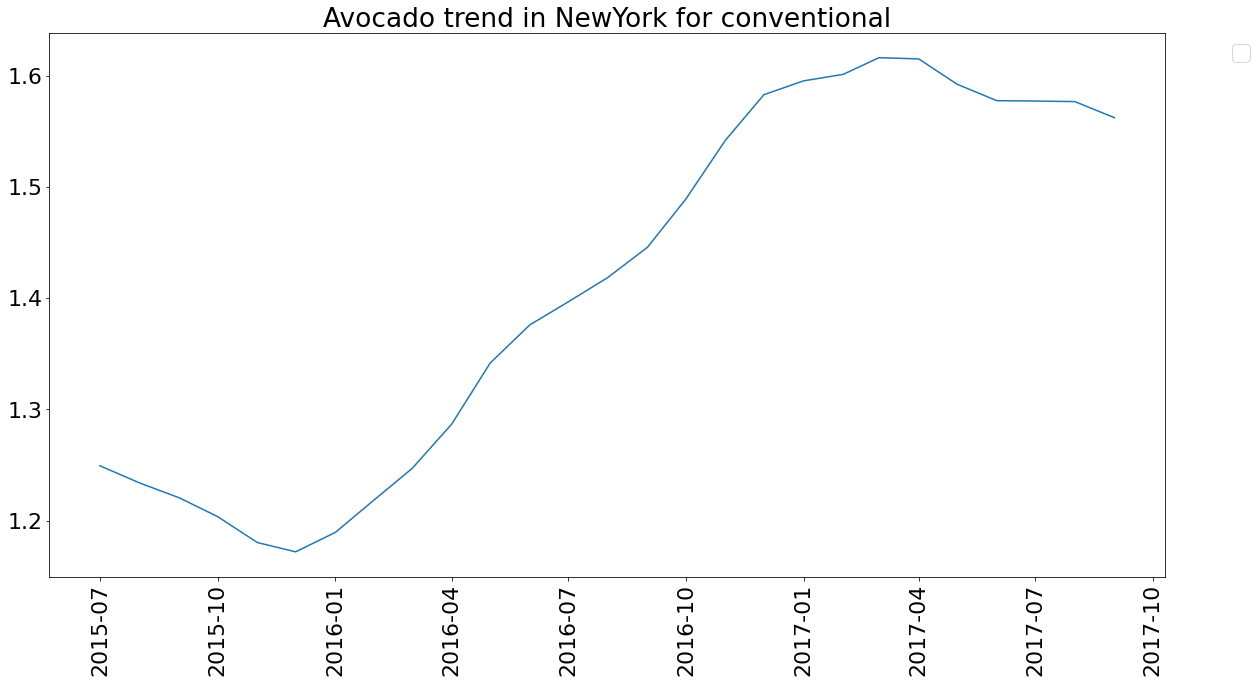

No handles with labels found to put in legend.


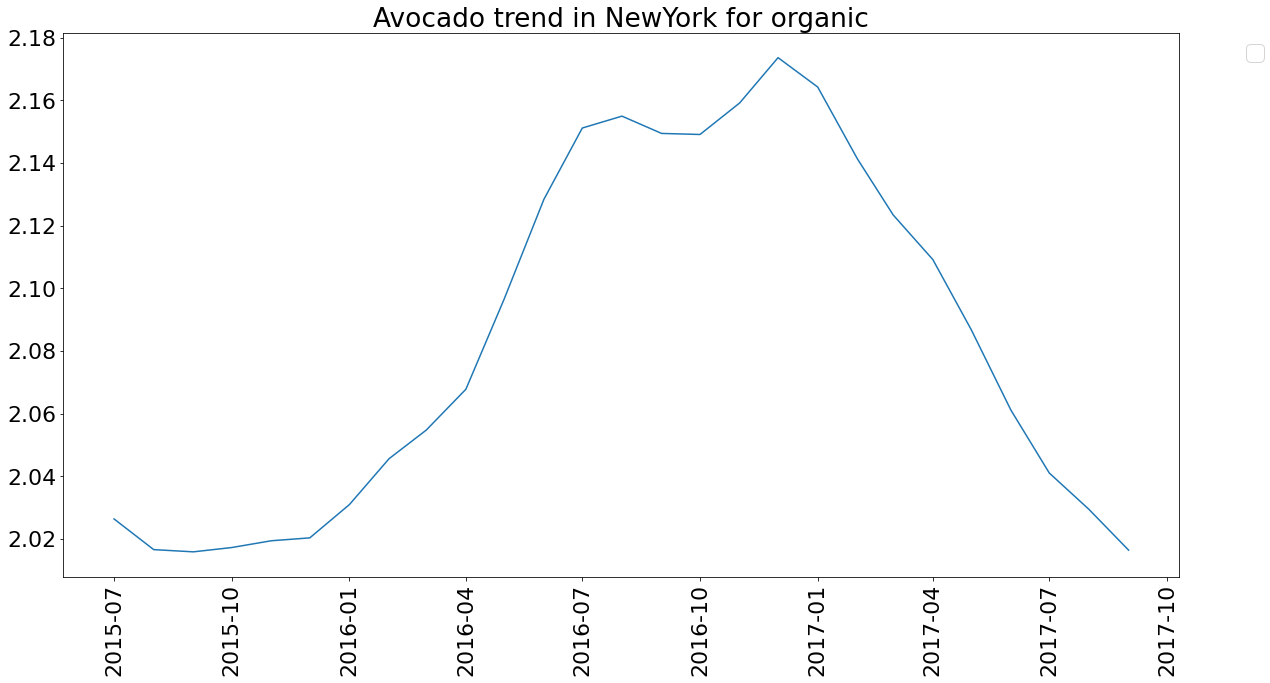

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_ny = df.query('region == "NewYork"')
    df_ny['Date'] = df_ny['Date'].astype("string")
    df_ny['Date'] = df_ny['Date'].str[:-3]
    df_ny = df_ny.loc[df['type'] == i]
    df_ny_price = df_ny.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_ny_price = df_ny_price.groupby(df_ny_price['Date']).aggregate(agg).reset_index()
    df_ny_price['Date'] = pd.to_datetime(df_ny_price['Date'])

    decompose_con = df_ny_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in NewYork for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

## Orlando

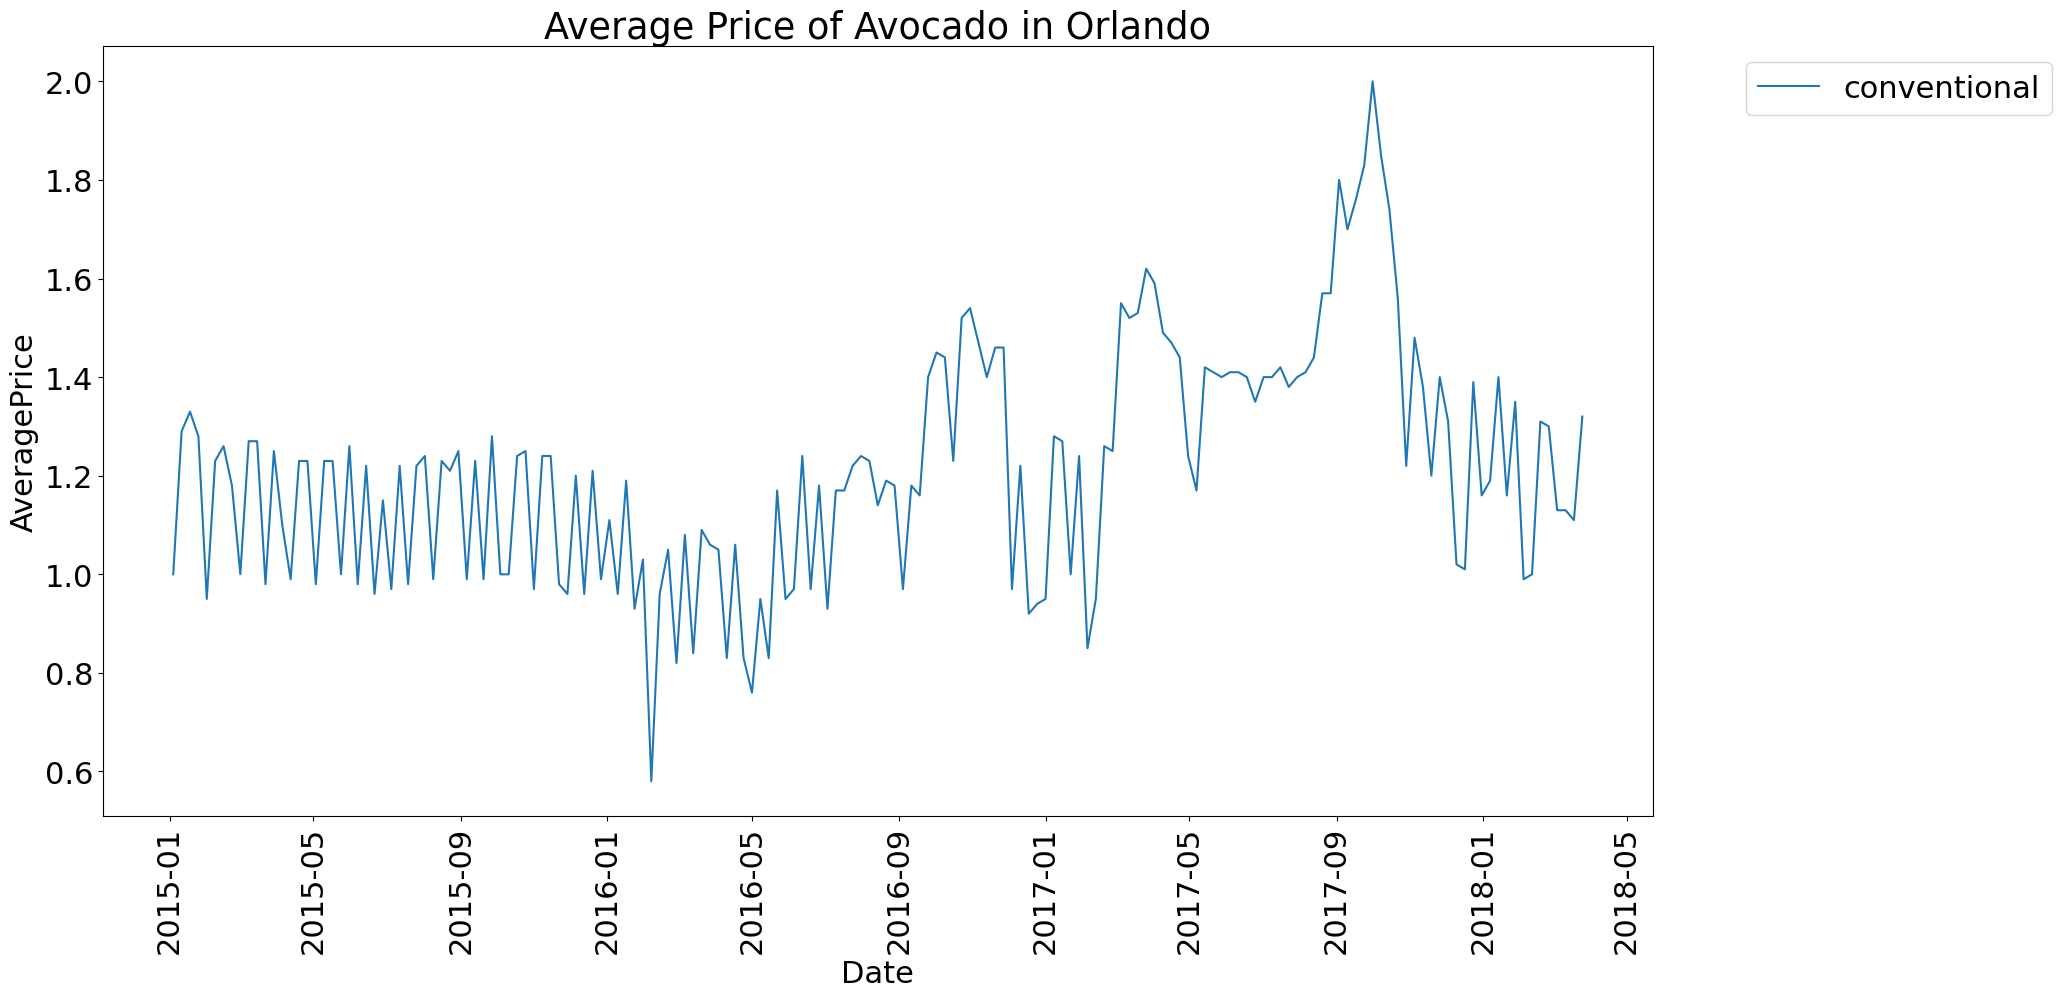

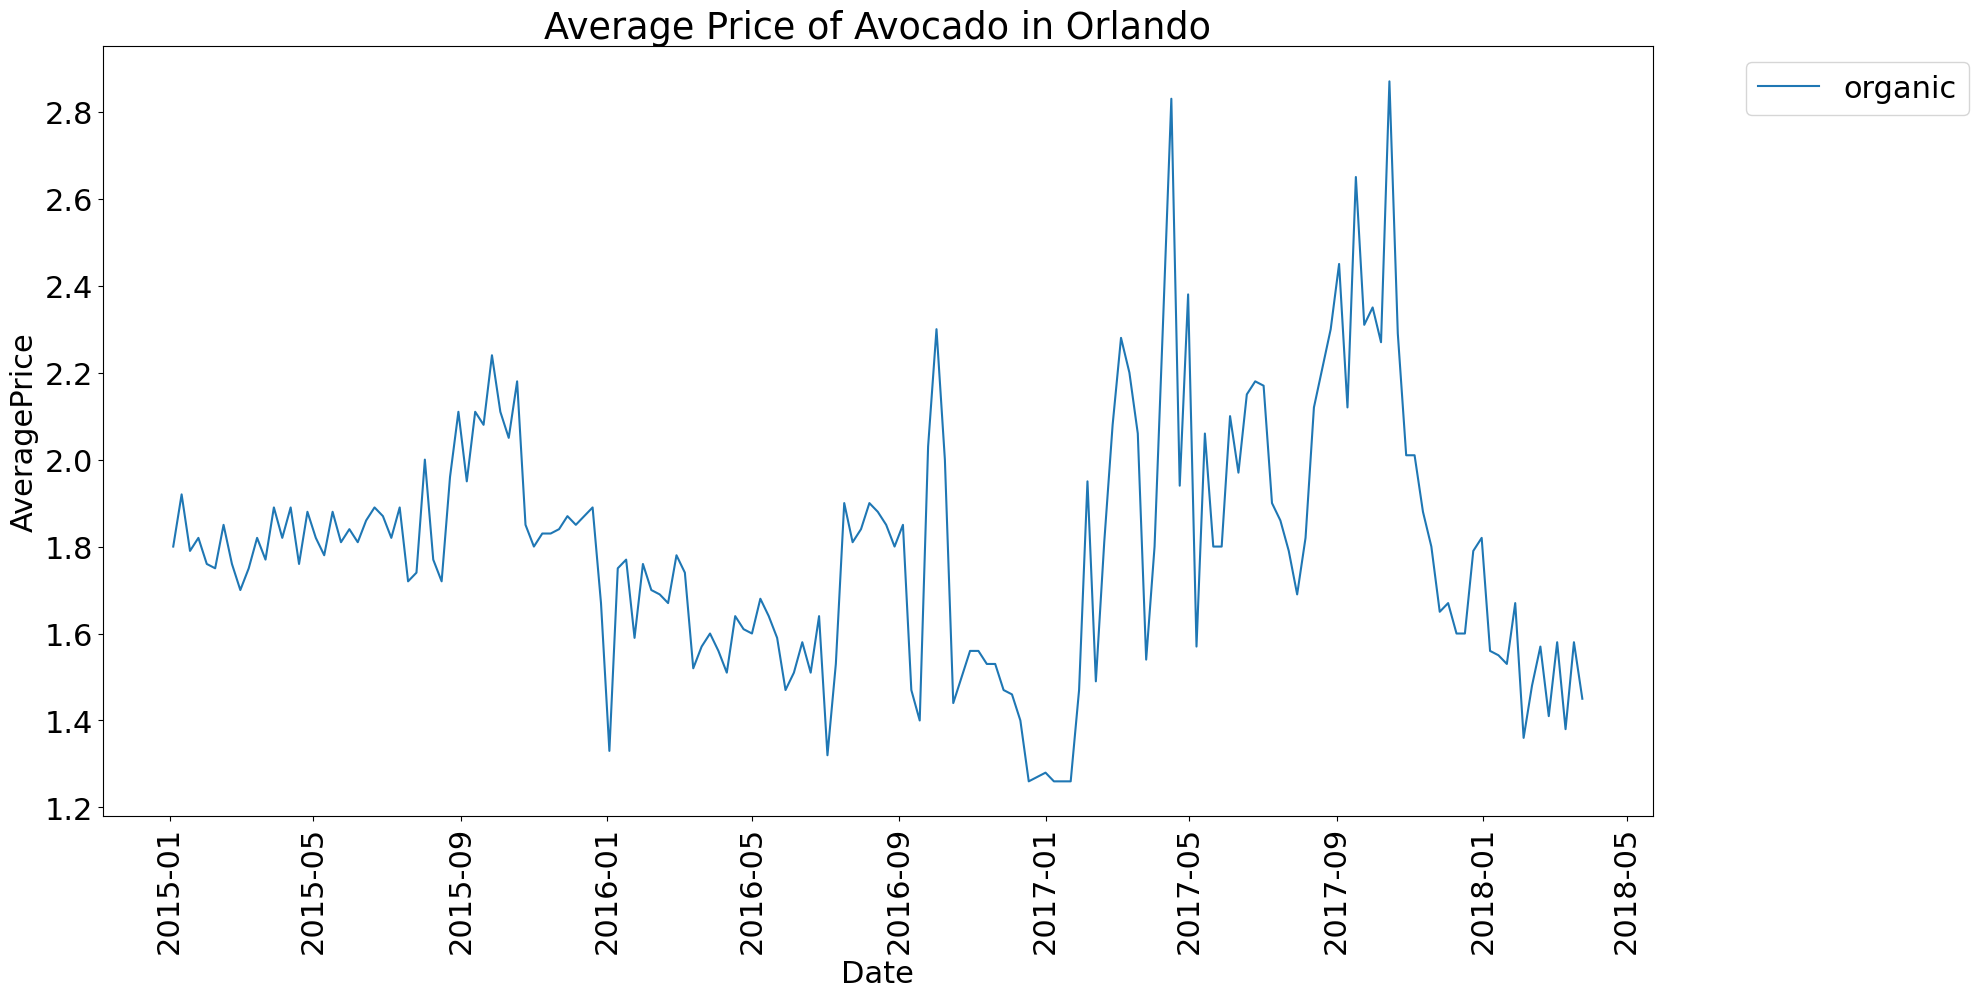

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_HartfordSpringfield = df.query('region == "Orlando"')
    sns.lineplot(data=df_HartfordSpringfield.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in Orlando")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


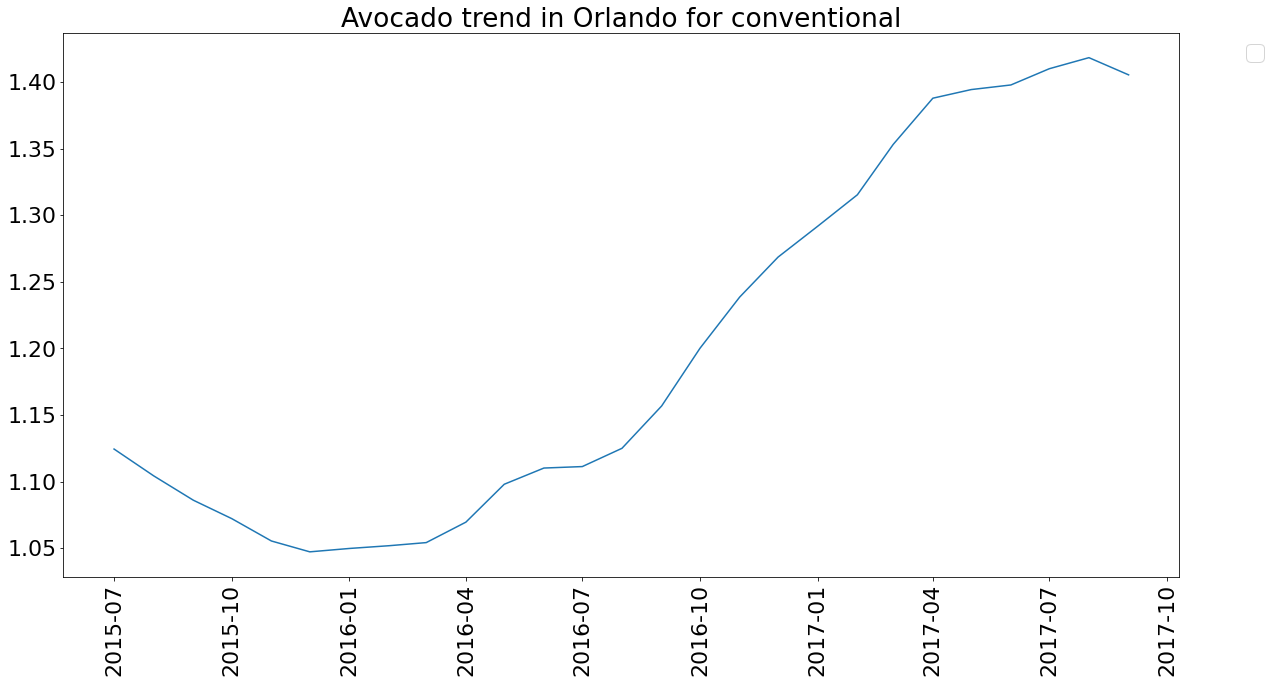

No handles with labels found to put in legend.


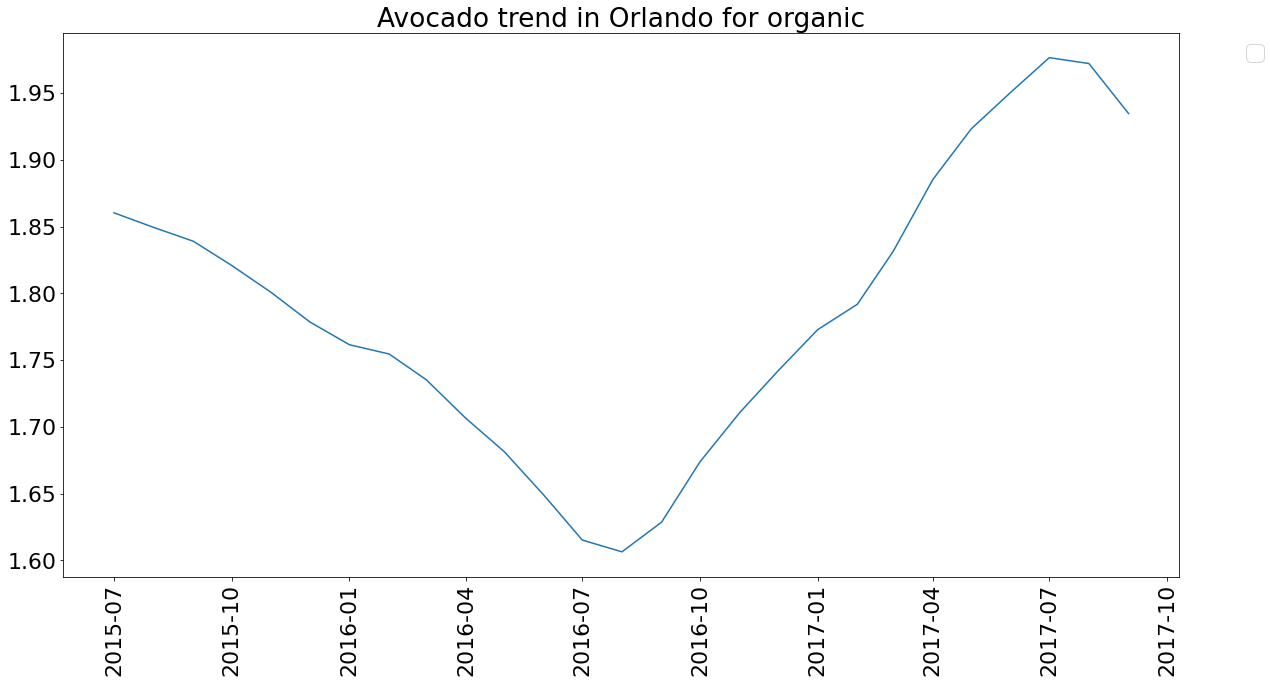

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_ol = df.query('region == "Orlando"')
    df_ol['Date'] = df_ol['Date'].astype("string")
    df_ol['Date'] = df_ol['Date'].str[:-3]
    df_ol = df_ol.loc[df['type'] == i]
    df_ol_price = df_ol.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_ol_price = df_ol_price.groupby(df_ol_price['Date']).aggregate(agg).reset_index()
    df_ol_price['Date'] = pd.to_datetime(df_ol_price['Date'])

    decompose_con = df_ol_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in Orlando for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

## Boise

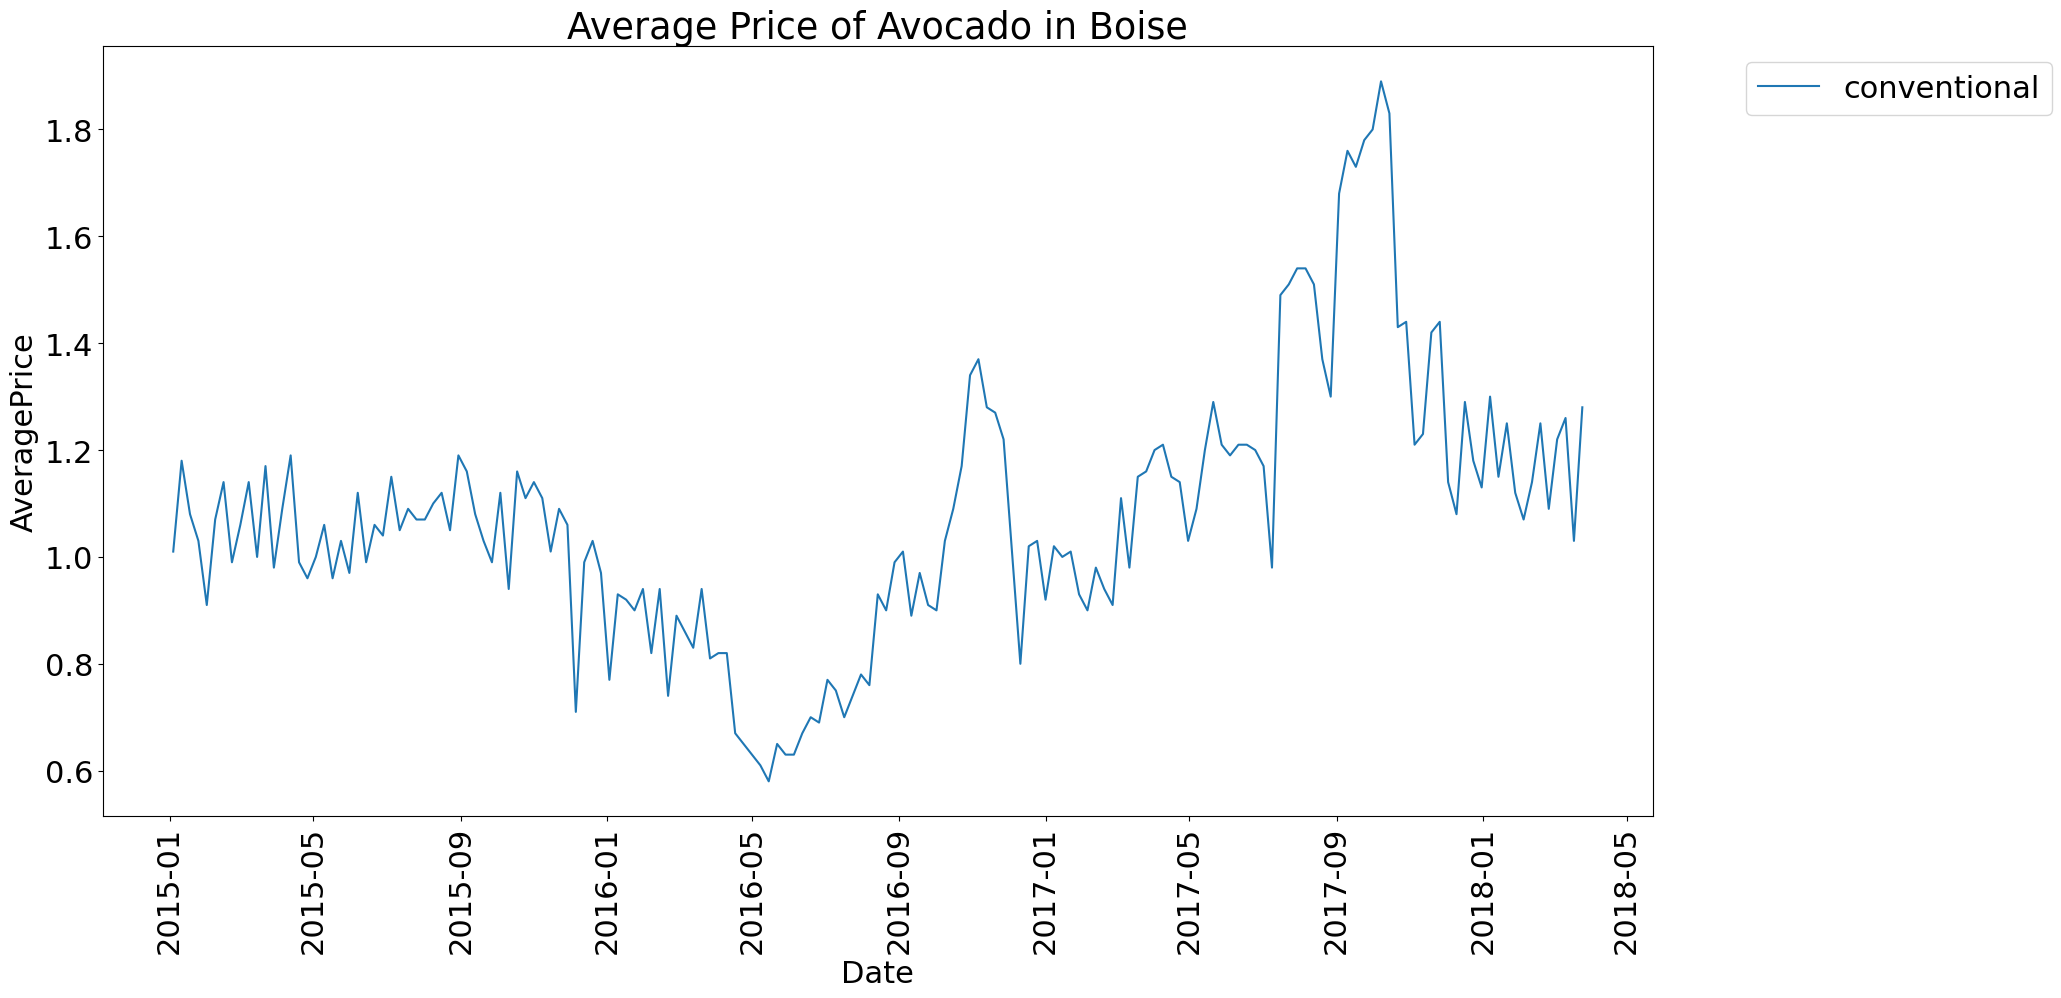

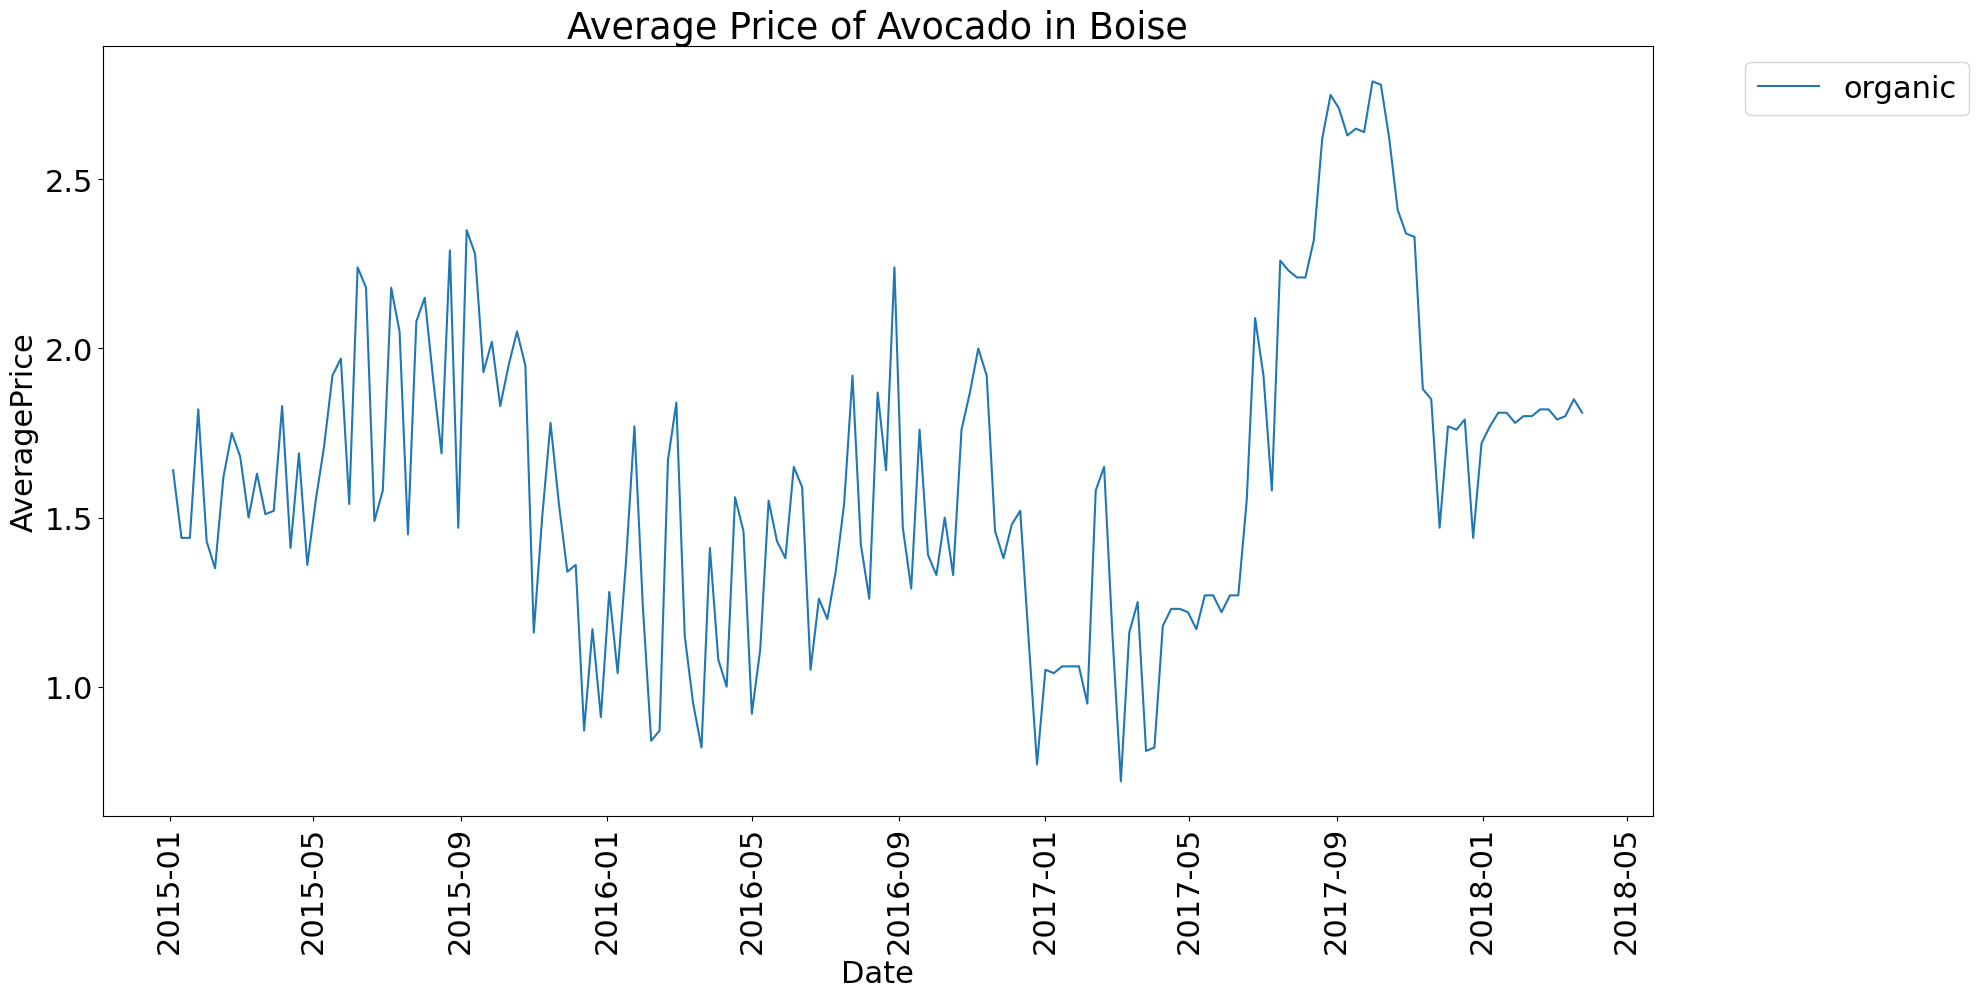

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_HartfordSpringfield = df.query('region == "Boise"')
    sns.lineplot(data=df_HartfordSpringfield.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in Boise")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


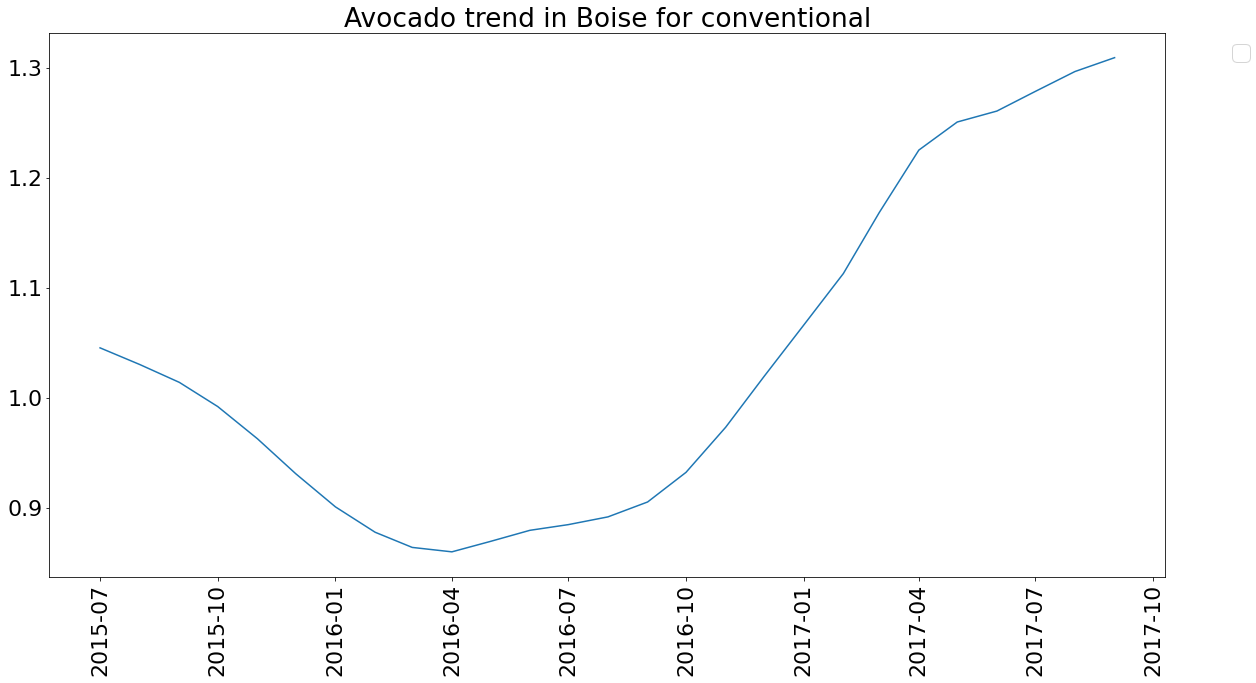

No handles with labels found to put in legend.


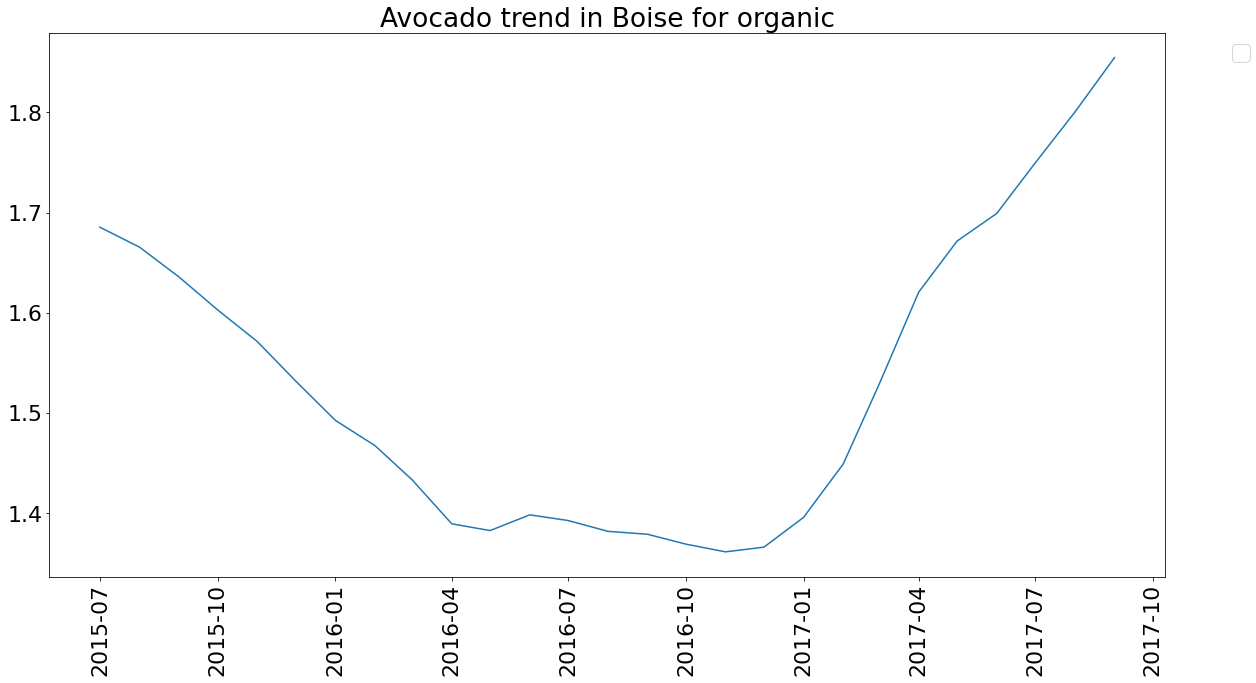

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_b = df.query('region == "Boise"')
    df_b['Date'] = df_b['Date'].astype("string")
    df_b['Date'] = df_b['Date'].str[:-3]
    df_b = df_b.loc[df['type'] == i]
    df_b_price = df_b.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_b_price = df_b_price.groupby(df_b_price['Date']).aggregate(agg).reset_index()
    df_b_price['Date'] = pd.to_datetime(df_b_price['Date'])

    decompose_con = df_b_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in Boise for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

## Spokane

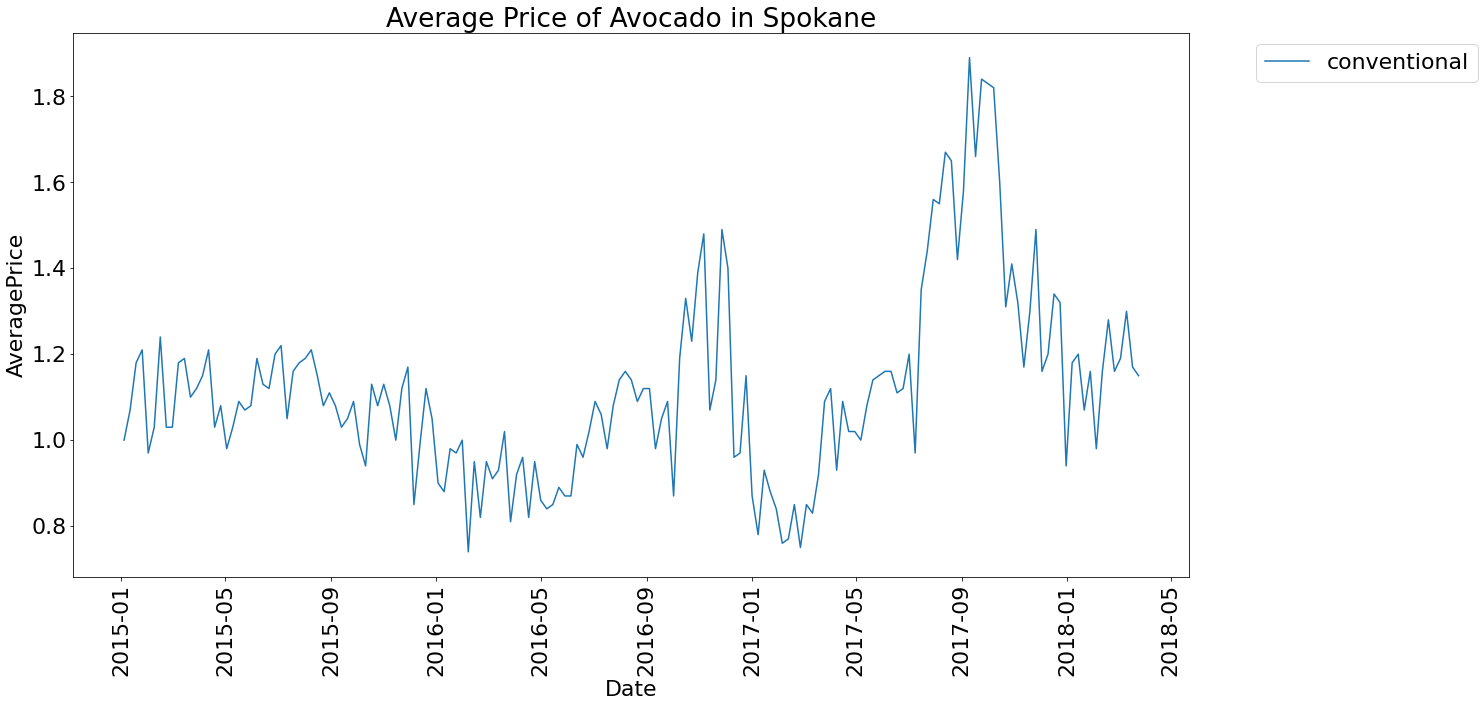

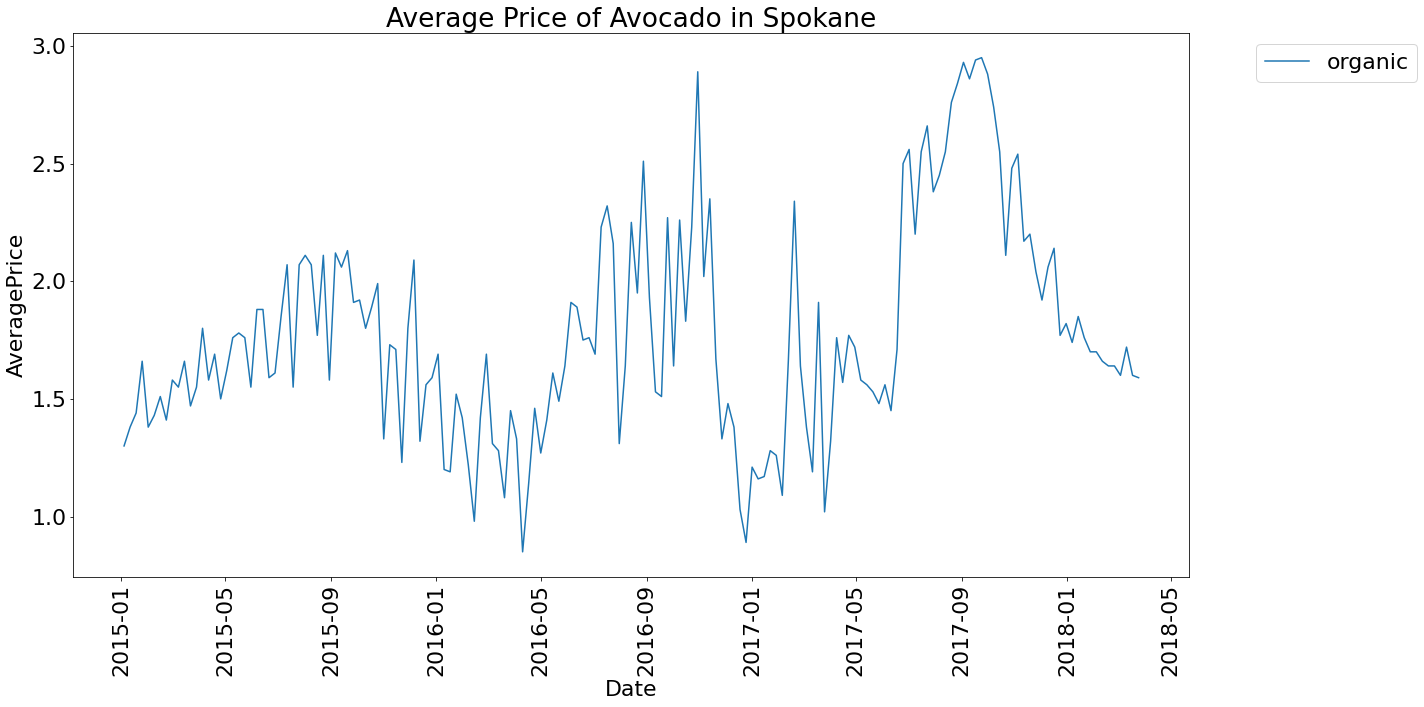

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_Spokane = df.query('region == "Spokane"')
    sns.lineplot(data=df_Spokane.loc[df['type'] == i], 
                     x='Date', 
                     y='AveragePrice', 
                     hue= 'type' , 
                     legend='full')

    # add title
    plt.title("Average Price of Avocado in Spokane")
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

No handles with labels found to put in legend.


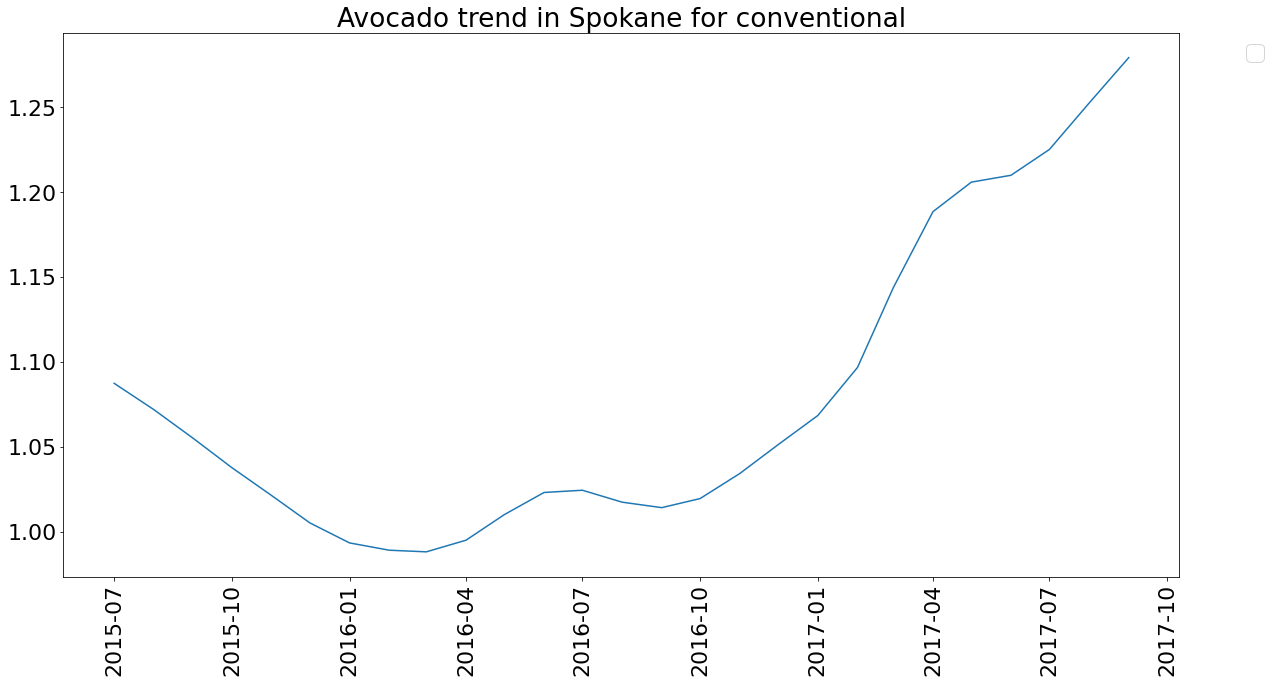

No handles with labels found to put in legend.


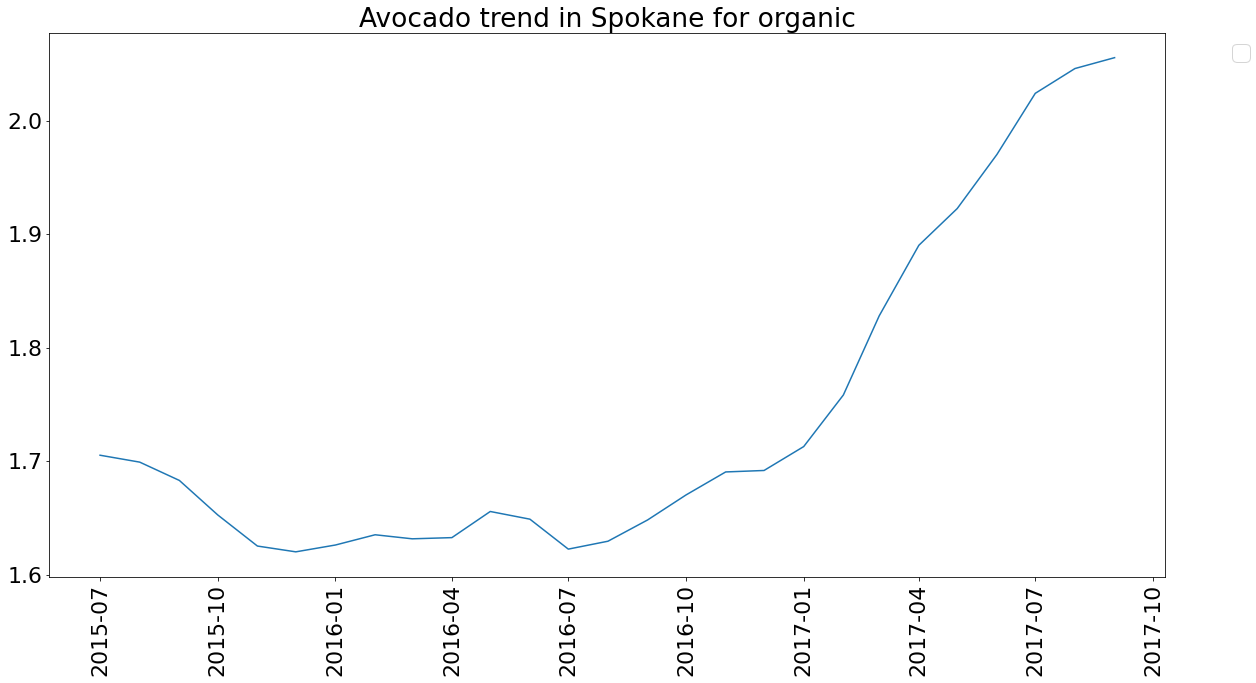

In [ ]:
for i in df.type.unique():  
    plt.rcParams.update({'font.size': 22})
    plt.subplots(figsize=(20,10))
    df_sk = df.query('region == "Spokane"')
    df_sk['Date'] = df_sk['Date'].astype("string")
    df_sk['Date'] = df_sk['Date'].str[:-3]
    df_sk = df_sk.loc[df['type'] == i]
    df_sk_price = df_sk.iloc[:, :2]
    agg = {'AveragePrice':'mean'}
    df_sk_price = df_sk_price.groupby(df_sk_price['Date']).aggregate(agg).reset_index()
    df_sk_price['Date'] = pd.to_datetime(df_sk_price['Date'])

    decompose_con = df_sk_price.set_index('Date')
    decompose_con_price = seasonal_decompose(decompose_con)
    plt.plot(decompose_con_price.trend) 
    # add title
    plt.title("Avocado trend in Spokane for " + i)
    
    plt.xticks(rotation=90)

    # move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    plt.show()

Nhận xét:

      Em xin chọn vùng Spokane vì:

      Đối với conventional:

		    từ 2016/5 trở đi giá bơ không còn rớt giá hơn 0.8
		    sau mỗi lần giá giảm mạnh giá sẽ tăng rất nhanh phục hồi hơn cả giá cũ 2016/11 đến 2016/12 từ 2017/9 đến 2017/12
		    tuy nhiên trong lúc gia tăng thì có rớt giá nhưng đêu nhanh chóng phục hồi
		    Trước mắt thì đang đi xuống nhưng sau khi thực hiện và thu hoạch vận chuyển tới thì bơ sẽ ngay mức phục hồi giá




      Đối với organic :
		    Giá có trend là đầu năm giá tăng và cuối năm giá giảm 
		    Theo chu kỳ 1 năm, tháng có giá cao nhất trong năm tăng dần
		    Nhiểu lần giá vượt 2.8
		    


Kết luận:

		* thị trường phục hồi nhanh có tăng trưởng hàng năm
		* Đối với Organic thì phải theo chu kì, tăng sản lượng từ khi giá giảm mạnh đến tháng 8, giảm sản lượng sau tháng 8 để tạo nên khang hiếm bơ để giảm đà rớt giá

Cách trình bày biểu đồ để:

      * Lựa seaborn lineplot để có một biểu đồ rõ ràng (không chọn plot trong pyplot)

      * Chỉnh lại front chữ và xoay lại label của trục X


Kết luận:

    Khi ta dự đoán "AveragePrice" theo các mode regression thì ta nên lựa cột: "Total Volume", "Total Bags", "type", "region", "year" và chia cột "Date" thành "Month", "Season" để train

    Khi ta dự đoán "AveragePrice" theo các mode Time-Series thì chỉ lựa 2 cột "Date", "AveragePrice"